Sebastián Castro Rodríguez
10-05-2019
Temas Alcaldia Mayor de Bogotá D.C.
Periodo 2012- Mayo 2019

In [127]:
# Requirements

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import string
import unidecode
from itertools import permutations
import networkx as nx

In [2]:
def get_html(url):
    '''
    Requests url and parses text. Returns Beautiful Soup object.
    '''
    resp = requests.get(url).text
    return BeautifulSoup(resp,"lxml")

In [3]:
def get_links(soup, regex):
    '''
    Extracts url links to news. Returns a list of urls of news.
    '''
    links = soup.find_all('a')
    return re.findall(regex, str(links))

In [4]:
def links_news(main_urls, regex):
    '''
    Makes a list with the links to all news.
    '''
    news_urls = []
    for url in main_urls:
        soup = get_html(url)
        urls = get_links(soup, regex)
        news_urls = news_urls + urls
    return news_urls

In [5]:
def get_date(soup):
    '''
    Returns year, month, and day and hour from url
    '''
    date = re.findall('</div><div class="col-sm-4 date">            \n          (.+?)\n        </div></div><div class="row stats-n-author author sna-vis"><div class="col-sm-4">', str(soup))[0]
    
    year = date[11:]
    month = date[5:8]
    day = date[:2]
    dm = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
    
    for i, j in dm.items():
        if month == i:
            month = j
    return year, month, day

In [6]:
def get_title(soup):
    '''
    Returns title of new
    '''
    try:
        title = re.findall('<meta content="(.+?)" property="og:title"/>', str(soup))[0]
    except:
        title = re.findall('<meta content=\'(.+?)\' property="og:title"/>', str(soup))[0]
    return title

In [7]:
def get_new(soup):
    '''
    Returns text of new
    '''
    return str(soup.find_all('p'))

In [8]:
def remove_tags(text):
    '''
    Strips text from html and other tags
    '''
    return re.sub('<[^>]+>|\]|\[|\\u200b|\\n|\xa0', '', text)

In [58]:
def get_new_elements(new_url):
    '''
    Returns
    '''
    soup = get_html(new_url)
    title = get_title(soup)
    year, month, day = get_date(soup)
    new = remove_tags(get_new(soup))
    new = new[1044:]
    return [year, month, day, title, new_url, new]

In [10]:
pags201211 = range(1,9)
pags201212 = range(1,21)
pags201301 = range(1,15)
pags201302 = range(1,29)
pags201303 = range(1,29)
pags201304 = range(1,27)
pags201305 = range(1,26)
pags201306 = range(1,32)
pags201307 = range(1,38)
pags201308 = range(1,34)
pags201309 = range(1,34)
pags201310 = range(1,37)
pags201311 = range(1,30)
pags201312 = range(1,28)
pags201401 = range(1,25)
pags201402 = range(1,26)
pags201403 = range(1,30)
pags201404 = range(1,29)
pags201405 = range(1,30)
pags201406 = range(1,29)
pags201407 = range(1,33)
pags201408 = range(1,31)
pags201409 = range(1,29)
pags201410 = range(1,34)
pags201411 = range(1,28)
pags201412 = range(1,28)
pags201501 = range(1,31)
pags201502 = range(1,33)
pags201503 = range(1,34)
pags201504 = range(1,36)
pags201505 = range(1,36)
pags201506 = range(1,28)
pags201507 = range(1,27)
pags201508 = range(1,27)
pags201509 = range(1,27)
pags201510 = range(1,27)
pags201511 = range(1,25)
pags201512 = range(1,24)
pags201601 = range(1,20)
pags201602 = range(1,19)
pags201603 = range(1,17)
pags201604 = range(1,20)
pags201605 = range(1,16)
pags201606 = range(1,17)
pags201607 = range(1,17)
pags201608 = range(1,18)
pags201609 = range(1,23)
pags201610 = range(1,24)
pags201611 = range(1,20)
pags201612 = range(1,21)
pags201701 = range(1,15)
pags201702 = range(1,22)
pags201703 = range(1,10)
pags201704 = range(1,9)
pags201705 = range(1,26)
pags201706 = range(1,28)
pags201707 = range(1,31)
pags201708 = range(1,31)
pags201709 = range(1,26)
pags201710 = range(1,26)
pags201711 = range(1,24)
pags201712 = range(1,20)
pags201801 = range(1,15)
pags201802 = range(1,32)
pags201803 = range(1,39)
pags201804 = range(1,34)
pags201805 = range(1,32)
pags201806 = range(1,28)
pags201807 = range(1,27)
pags201808 = range(1,32)
pags201809 = range(1,28)
pags201810 = range(1,35)
pags201811 = range(1,31)
pags201812 = range(1,28)
pags201901 = range(1,28)
pags201902 = range(1,34)
pags201903 = range(1,57)
pags201904 = range(1,62)
pags201905 = range(1,26)

In [11]:
pags_201211 = []
for pag in pags201211:
    pags_201211.append('/201211?page='+ str(pag) )
pags_201212 = []
for pag in pags201212:
    pags_201212.append('/201212?page='+ str(pag) )
pags_201301 = []
for pag in pags201301:
    pags_201301.append('/201301?page='+ str(pag) )
pags_201302 = []
for pag in pags201302:
    pags_201302.append('/201302?page='+ str(pag) )
pags_201303 = []
for pag in pags201303:
    pags_201303.append('/201303?page='+ str(pag) )
pags_201304 = []
for pag in pags201304:
    pags_201304.append('/201304?page='+ str(pag) )
pags_201305 = []
for pag in pags201305:
    pags_201305.append('/201305?page='+ str(pag) )
pags_201306 = []
for pag in pags201306:
    pags_201306.append('/201306?page='+ str(pag) )
pags_201307 = []
for pag in pags201307:
    pags_201307.append('/201307?page='+ str(pag) )
pags_201308 = []
for pag in pags201308:
    pags_201308.append('/201308?page='+ str(pag) )
pags_201309 = []
for pag in pags201309:
    pags_201309.append('/201309?page='+ str(pag) )
pags_201310 = []
for pag in pags201310:
    pags_201310.append('/201310?page='+ str(pag) )
pags_201311 = []
for pag in pags201311:
    pags_201311.append('/201311?page='+ str(pag) )
pags_201312 = []
for pag in pags201312:
    pags_201312.append('/201312?page='+ str(pag) )
pags_201401 = []
for pag in pags201401:
    pags_201401.append('/201401?page='+ str(pag) )
pags_201402 = []
for pag in pags201402:
    pags_201402.append('/201402?page='+ str(pag) )
pags_201403 = []
for pag in pags201403:
    pags_201403.append('/201403?page='+ str(pag) )
pags_201404 = []
for pag in pags201404:
    pags_201404.append('/201404?page='+ str(pag) )
pags_201405 = []
for pag in pags201405:
    pags_201405.append('/201405?page='+ str(pag) )
pags_201406 = []
for pag in pags201406:
    pags_201406.append('/201406?page='+ str(pag) )
pags_201407 = []
for pag in pags201407:
    pags_201407.append('/201407?page='+ str(pag) )
pags_201408 = []
for pag in pags201408:
    pags_201408.append('/201408?page='+ str(pag) )
pags_201409 = []
for pag in pags201409:
    pags_201409.append('/201409?page='+ str(pag) )
pags_201410 = []
for pag in pags201410:
    pags_201410.append('/201410?page='+ str(pag) )
pags_201411 = []
for pag in pags201411:
    pags_201411.append('/201411?page='+ str(pag) )
pags_201412 = []
for pag in pags201412:
    pags_201412.append('/201412?page='+ str(pag) )
pags_201501 = []
for pag in pags201501:
    pags_201501.append('/201501?page='+ str(pag) )
pags_201502 = []
for pag in pags201502:
    pags_201502.append('/201502?page='+ str(pag) )
pags_201503 = []
for pag in pags201503:
    pags_201503.append('/201503?page='+ str(pag) )
pags_201504 = []
for pag in pags201504:
    pags_201504.append('/201504?page='+ str(pag) )
pags_201505 = []
for pag in pags201505:
    pags_201505.append('/201505?page='+ str(pag) )
pags_201506 = []
for pag in pags201506:
    pags_201506.append('/201506?page='+ str(pag) )
pags_201507 = []
for pag in pags201507:
    pags_201507.append('/201507?page='+ str(pag) )
pags_201508 = []
for pag in pags201508:
    pags_201508.append('/201508?page='+ str(pag) )
pags_201509 = []
for pag in pags201509:
    pags_201509.append('/201509?page='+ str(pag) )
pags_201510 = []
for pag in pags201510:
    pags_201510.append('/201510?page='+ str(pag) )
pags_201511 = []
for pag in pags201511:
    pags_201511.append('/201511?page='+ str(pag) )
pags_201512 = []
for pag in pags201512:
    pags_201512.append('/201512?page='+ str(pag) )
pags_201601 = []
for pag in pags201601:
    pags_201601.append('/201601?page='+ str(pag) )
pags_201602 = []
for pag in pags201602:
    pags_201602.append('/201602?page='+ str(pag) )
pags_201603 = []
for pag in pags201603:
    pags_201603.append('/201603?page='+ str(pag) )
pags_201604 = []
for pag in pags201604:
    pags_201604.append('/201604?page='+ str(pag) )
pags_201605 = []
for pag in pags201605:
    pags_201605.append('/201605?page='+ str(pag) )
pags_201606 = []
for pag in pags201606:
    pags_201606.append('/201606?page='+ str(pag) )
pags_201607 = []
for pag in pags201607:
    pags_201607.append('/201607?page='+ str(pag) )
pags_201608 = []
for pag in pags201608:
    pags_201608.append('/201608?page='+ str(pag) )
pags_201609 = []
for pag in pags201609:
    pags_201609.append('/201609?page='+ str(pag) )
pags_201610 = []
for pag in pags201610:
    pags_201610.append('/201610?page='+ str(pag) )
pags_201611 = []
for pag in pags201611:
    pags_201611.append('/201611?page='+ str(pag) )
pags_201612 = []
for pag in pags201612:
    pags_201612.append('/201612?page='+ str(pag) )
pags_201701 = []
for pag in pags201701:
    pags_201701.append('/201701?page='+ str(pag) )
pags_201702 = []
for pag in pags201702:
    pags_201702.append('/201702?page='+ str(pag) )
pags_201703 = []
for pag in pags201703:
    pags_201703.append('/201703?page='+ str(pag) )
pags_201704 = []
for pag in pags201704:
    pags_201704.append('/201704?page='+ str(pag) )
pags_201705 = []
for pag in pags201705:
    pags_201705.append('/201705?page='+ str(pag) )
pags_201706 = []
for pag in pags201706:
    pags_201706.append('/201706?page='+ str(pag) )
pags_201707 = []
for pag in pags201707:
    pags_201707.append('/201707?page='+ str(pag) )
pags_201708 = []
for pag in pags201708:
    pags_201708.append('/201708?page='+ str(pag) )
pags_201709 = []
for pag in pags201709:
    pags_201709.append('/201709?page='+ str(pag) )
pags_201710 = []
for pag in pags201710:
    pags_201710.append('/201710?page='+ str(pag) )
pags_201711 = []
for pag in pags201711:
    pags_201711.append('/201711?page='+ str(pag) )
pags_201712 = []
for pag in pags201712:
    pags_201712.append('/201712?page='+ str(pag) )
pags_201801 = []
for pag in pags201801:
    pags_201801.append('/201801?page='+ str(pag) )
pags_201802 = []
for pag in pags201802:
    pags_201802.append('/201802?page='+ str(pag) )
pags_201803 = []
for pag in pags201803:
    pags_201803.append('/201803?page='+ str(pag) )
pags_201804 = []
for pag in pags201804:
    pags_201804.append('/201804?page='+ str(pag) )
pags_201805 = []
for pag in pags201805:
    pags_201805.append('/201805?page='+ str(pag) )
pags_201806 = []
for pag in pags201806:
    pags_201806.append('/201806?page='+ str(pag) )
pags_201807 = []
for pag in pags201807:
    pags_201807.append('/201807?page='+ str(pag) )
pags_201808 = []
for pag in pags201808:
    pags_201808.append('/201808?page='+ str(pag) )
pags_201809 = []
for pag in pags201809:
    pags_201809.append('/201809?page='+ str(pag) )
pags_201810 = []
for pag in pags201810:
    pags_201810.append('/201810?page='+ str(pag) )
pags_201811 = []
for pag in pags201811:
    pags_201811.append('/201811?page='+ str(pag) )
pags_201812 = []
for pag in pags201812:
    pags_201812.append('/201812?page='+ str(pag) )
pags_201901 = []
for pag in pags201901:
    pags_201901.append('/201901?page='+ str(pag) )
pags_201902 = []
for pag in pags201902:
    pags_201902.append('/201902?page='+ str(pag) )
pags_201903 = []
for pag in pags201903:
    pags_201903.append('/201903?page='+ str(pag) )
pags_201904 = []
for pag in pags201904:
    pags_201904.append('/201904?page='+ str(pag) )
pags_201905 = []
for pag in pags201905:
    pags_201905.append('/201905?page='+ str(pag) )

In [12]:
main_urls201211 = []
prefix = 'http://www.bogota.gov.co/archivo'
main_urls201211.append(prefix +'/201211')
for suffix in pags_201211:  # All pags 2012-11
    main_urls201211.append(prefix + suffix)
main_urls201212 = []
main_urls201212.append(prefix +'/201212')
for suffix in pags_201212:  # All pags 2012-12
    main_urls201212.append(prefix + suffix)
main_urls201301 = []
main_urls201301.append(prefix +'/201301')
for suffix in pags_201301:  # All pags 2012-12
    main_urls201301.append(prefix + suffix)
main_urls201302 = []
main_urls201302.append(prefix +'/201302')
for suffix in pags_201302:  # All pags 2012-12
    main_urls201302.append(prefix + suffix)
main_urls201303 = []
main_urls201303.append(prefix +'/201303')
for suffix in pags_201303:  # All pags 2012-12
    main_urls201303.append(prefix + suffix)
main_urls201304 = []
main_urls201304.append(prefix +'/201304')
for suffix in pags_201304:  # All pags 2012-12
    main_urls201304.append(prefix + suffix)
main_urls201305 = []
main_urls201305.append(prefix +'/201305')
for suffix in pags_201305:  # All pags 2012-12
    main_urls201305.append(prefix + suffix)
main_urls201306 = []
main_urls201306.append(prefix +'/201306')
for suffix in pags_201306:  # All pags 2012-12
    main_urls201306.append(prefix + suffix)
main_urls201307 = []
main_urls201307.append(prefix +'/201307')
for suffix in pags_201307:  # All pags 2012-12
    main_urls201307.append(prefix + suffix)
main_urls201308 = []
main_urls201308.append(prefix +'/201308')
for suffix in pags_201308:  # All pags 2012-12
    main_urls201308.append(prefix + suffix)
main_urls201309 = []
main_urls201309.append(prefix +'/201309')
for suffix in pags_201309:  # All pags 2012-12
    main_urls201309.append(prefix + suffix)
main_urls201310 = []
main_urls201310.append(prefix +'/201310')
for suffix in pags_201310:  # All pags 2012-12
    main_urls201310.append(prefix + suffix)
main_urls201311 = []
main_urls201311.append(prefix +'/201311')
for suffix in pags_201311:  # All pags 2012-12
    main_urls201311.append(prefix + suffix)
main_urls201312 = []
main_urls201312.append(prefix +'/201312')
for suffix in pags_201312:  # All pags 2012-12
    main_urls201312.append(prefix + suffix)
main_urls201401 = []
main_urls201401.append(prefix +'/201401')
for suffix in pags_201401:  # All pags 2012-12
    main_urls201401.append(prefix + suffix)
main_urls201402 = []
main_urls201402.append(prefix +'/201402')
for suffix in pags_201402:  # All pags 2012-12
    main_urls201402.append(prefix + suffix)
main_urls201403 = []
main_urls201403.append(prefix +'/201403')
for suffix in pags_201403:  # All pags 2012-12
    main_urls201403.append(prefix + suffix)
main_urls201404 = []
main_urls201404.append(prefix +'/201404')
for suffix in pags_201404:  # All pags 2012-12
    main_urls201404.append(prefix + suffix)
main_urls201405 = []
main_urls201405.append(prefix +'/201405')
for suffix in pags_201405:  # All pags 2012-12
    main_urls201405.append(prefix + suffix)
main_urls201406 = []
main_urls201406.append(prefix +'/201406')
for suffix in pags_201406:  # All pags 2012-12
    main_urls201406.append(prefix + suffix)
main_urls201407 = []
main_urls201407.append(prefix +'/201407')
for suffix in pags_201407:  # All pags 2012-12
    main_urls201407.append(prefix + suffix)
main_urls201408 = []
main_urls201408.append(prefix +'/201408')
for suffix in pags_201408:  # All pags 2012-12
    main_urls201408.append(prefix + suffix)
main_urls201409 = []
main_urls201409.append(prefix +'/201409')
for suffix in pags_201409:  # All pags 2012-12
    main_urls201409.append(prefix + suffix)
main_urls201410 = []
main_urls201410.append(prefix +'/201410')
for suffix in pags_201410:  # All pags 2012-12
    main_urls201410.append(prefix + suffix)
main_urls201411 = []
main_urls201411.append(prefix +'/201411')
for suffix in pags_201411:  # All pags 2012-12
    main_urls201411.append(prefix + suffix)
main_urls201412 = []
main_urls201412.append(prefix +'/201412')
for suffix in pags_201412:  # All pags 2012-12
    main_urls201412.append(prefix + suffix)
main_urls201501 = []
main_urls201501.append(prefix +'/201501')
for suffix in pags_201501:  # All pags 2012-12
    main_urls201501.append(prefix + suffix)
main_urls201502 = []
main_urls201502.append(prefix +'/201502')
for suffix in pags_201502:  # All pags 2012-12
    main_urls201502.append(prefix + suffix)
main_urls201503 = []
main_urls201503.append(prefix +'/201503')
for suffix in pags_201503:  # All pags 2012-12
    main_urls201503.append(prefix + suffix)
main_urls201504 = []
main_urls201504.append(prefix +'/201504')
for suffix in pags_201504:  # All pags 2012-12
    main_urls201504.append(prefix + suffix)
main_urls201505 = []
main_urls201505.append(prefix +'/201505')
for suffix in pags_201505:  # All pags 2012-12
    main_urls201505.append(prefix + suffix)
main_urls201506 = []
main_urls201506.append(prefix +'/201506')
for suffix in pags_201506:  # All pags 2012-12
    main_urls201506.append(prefix + suffix)
main_urls201507 = []
main_urls201507.append(prefix +'/201507')
for suffix in pags_201507:  # All pags 2012-12
    main_urls201507.append(prefix + suffix)
main_urls201508 = []
main_urls201508.append(prefix +'/201508')
for suffix in pags_201508:  # All pags 2012-12
    main_urls201508.append(prefix + suffix)
main_urls201509 = []
main_urls201509.append(prefix +'/201509')
for suffix in pags_201509:  # All pags 2012-12
    main_urls201509.append(prefix + suffix)
main_urls201510 = []
main_urls201510.append(prefix +'/201510')
for suffix in pags_201510:  # All pags 2012-12
    main_urls201510.append(prefix + suffix)
main_urls201511 = []
main_urls201511.append(prefix +'/201511')
for suffix in pags_201511:  # All pags 2012-12
    main_urls201511.append(prefix + suffix)
main_urls201512 = []
main_urls201512.append(prefix +'/201512')
for suffix in pags_201512:  # All pags 2012-12
    main_urls201512.append(prefix + suffix)
main_urls201601 = []
main_urls201601.append(prefix +'/201601')
for suffix in pags_201601:  # All pags 2012-12
    main_urls201601.append(prefix + suffix)
main_urls201602 = []
main_urls201602.append(prefix +'/201602')
for suffix in pags_201602:  # All pags 2012-12
    main_urls201602.append(prefix + suffix)
main_urls201603 = []
main_urls201603.append(prefix +'/201603')
for suffix in pags_201603:  # All pags 2012-12
    main_urls201603.append(prefix + suffix)
main_urls201604 = []
main_urls201604.append(prefix +'/201604')
for suffix in pags_201604:  # All pags 2012-12
    main_urls201604.append(prefix + suffix)
main_urls201605 = []
main_urls201605.append(prefix +'/201605')
for suffix in pags_201605:  # All pags 2012-12
    main_urls201605.append(prefix + suffix)
main_urls201606 = []
main_urls201606.append(prefix +'/201606')
for suffix in pags_201606:  # All pags 2012-12
    main_urls201606.append(prefix + suffix)
main_urls201607 = []
main_urls201607.append(prefix +'/201607')
for suffix in pags_201607:  # All pags 2012-12
    main_urls201607.append(prefix + suffix)
main_urls201608 = []
main_urls201608.append(prefix +'/201608')
for suffix in pags_201608:  # All pags 2012-12
    main_urls201608.append(prefix + suffix)
main_urls201609 = []
main_urls201609.append(prefix +'/201609')
for suffix in pags_201609:  # All pags 2012-12
    main_urls201609.append(prefix + suffix)
main_urls201610 = []
main_urls201610.append(prefix +'/201610')
for suffix in pags_201610:  # All pags 2012-12
    main_urls201610.append(prefix + suffix)
main_urls201611 = []
main_urls201611.append(prefix +'/201611')
for suffix in pags_201611:  # All pags 2012-12
    main_urls201611.append(prefix + suffix)
main_urls201612 = []
main_urls201612.append(prefix +'/201612')
for suffix in pags_201612:  # All pags 2012-12
    main_urls201612.append(prefix + suffix)
main_urls201701 = []
main_urls201701.append(prefix +'/201701')
for suffix in pags_201701:  # All pags 2012-12
    main_urls201701.append(prefix + suffix)
main_urls201702 = []
main_urls201702.append(prefix +'/201702')
for suffix in pags_201702:  # All pags 2012-12
    main_urls201702.append(prefix + suffix)
main_urls201703 = []
main_urls201703.append(prefix +'/201703')
for suffix in pags_201703:  # All pags 2012-12
    main_urls201703.append(prefix + suffix)
main_urls201704 = []
main_urls201704.append(prefix +'/201704')
for suffix in pags_201704:  # All pags 2012-12
    main_urls201704.append(prefix + suffix)
main_urls201705 = []
main_urls201705.append(prefix +'/201705')
for suffix in pags_201705:  # All pags 2012-12
    main_urls201705.append(prefix + suffix)
main_urls201706 = []
main_urls201706.append(prefix +'/201706')
for suffix in pags_201706:  # All pags 2012-12
    main_urls201706.append(prefix + suffix)
main_urls201707 = []
main_urls201707.append(prefix +'/201707')
for suffix in pags_201707:  # All pags 2012-12
    main_urls201707.append(prefix + suffix)
main_urls201708 = []
main_urls201708.append(prefix +'/201708')
for suffix in pags_201708:  # All pags 2012-12
    main_urls201708.append(prefix + suffix)
main_urls201709 = []
main_urls201709.append(prefix +'/201709')
for suffix in pags_201709:  # All pags 2012-12
    main_urls201709.append(prefix + suffix)
main_urls201710 = []
main_urls201710.append(prefix +'/201710')
for suffix in pags_201710:  # All pags 2012-12
    main_urls201710.append(prefix + suffix)
main_urls201711 = []
main_urls201711.append(prefix +'/201711')
for suffix in pags_201711:  # All pags 2012-12
    main_urls201711.append(prefix + suffix)
main_urls201712 = []
main_urls201712.append(prefix +'/201712')
for suffix in pags_201712:  # All pags 2012-12
    main_urls201712.append(prefix + suffix)
main_urls201801 = []
main_urls201801.append(prefix +'/201801')
for suffix in pags_201801:  # All pags 2012-12
    main_urls201801.append(prefix + suffix)
main_urls201802 = []
main_urls201802.append(prefix +'/201802')
for suffix in pags_201802:  # All pags 2012-12
    main_urls201802.append(prefix + suffix)
main_urls201803 = []
main_urls201803.append(prefix +'/201803')
for suffix in pags_201803:  # All pags 2012-12
    main_urls201803.append(prefix + suffix)
main_urls201804 = []
main_urls201804.append(prefix +'/201804')
for suffix in pags_201804:  # All pags 2012-12
    main_urls201804.append(prefix + suffix)
main_urls201805 = []
main_urls201805.append(prefix +'/201805')
for suffix in pags_201805:  # All pags 2012-12
    main_urls201805.append(prefix + suffix)
main_urls201806 = []
main_urls201806.append(prefix +'/201806')
for suffix in pags_201806:  # All pags 2012-12
    main_urls201806.append(prefix + suffix)
main_urls201807 = []
main_urls201807.append(prefix +'/201807')
for suffix in pags_201807:  # All pags 2012-12
    main_urls201807.append(prefix + suffix)
main_urls201808 = []
main_urls201808.append(prefix +'/201808')
for suffix in pags_201808:  # All pags 2012-12
    main_urls201808.append(prefix + suffix)
main_urls201809 = []
main_urls201809.append(prefix +'/201809')
for suffix in pags_201809:  # All pags 2012-12
    main_urls201809.append(prefix + suffix)
main_urls201810 = []
main_urls201810.append(prefix +'/201810')
for suffix in pags_201810:  # All pags 2012-12
    main_urls201810.append(prefix + suffix)
main_urls201811 = []
main_urls201811.append(prefix +'/201811')
for suffix in pags_201811:  # All pags 2012-12
    main_urls201811.append(prefix + suffix)
main_urls201812 = []
main_urls201812.append(prefix +'/201812')
for suffix in pags_201812:  # All pags 2012-12
    main_urls201812.append(prefix + suffix)
main_urls201901 = []
main_urls201901.append(prefix +'/201901')
for suffix in pags_201901:  # All pags 2012-12
    main_urls201901.append(prefix + suffix)
main_urls201902 = []
main_urls201902.append(prefix +'/201902')
for suffix in pags_201902:  # All pags 2012-12
    main_urls201902.append(prefix + suffix)
main_urls201903 = []
main_urls201903.append(prefix +'/201903')
for suffix in pags_201903:  # All pags 2012-12
    main_urls201903.append(prefix + suffix)
main_urls201904 = []
main_urls201904.append(prefix +'/201904')
for suffix in pags_201904:  # All pags 2012-12
    main_urls201904.append(prefix + suffix)
main_urls201905 = []
main_urls201905.append(prefix +'/201905')
for suffix in pags_201905:  # All pags 2012-12
    main_urls201905.append(prefix + suffix)

In [13]:
main_urls_all = []
for url in main_urls201211:
    main_urls_all.append(url)
for url in main_urls201212:
    main_urls_all.append(url)
for url in main_urls201301:
    main_urls_all.append(url)
for url in main_urls201302:
    main_urls_all.append(url)
for url in main_urls201303:
    main_urls_all.append(url)
for url in main_urls201304:
    main_urls_all.append(url)
for url in main_urls201305:
    main_urls_all.append(url)
for url in main_urls201306:
    main_urls_all.append(url)
for url in main_urls201307:
    main_urls_all.append(url)
for url in main_urls201308:
    main_urls_all.append(url)
for url in main_urls201309:
    main_urls_all.append(url)
for url in main_urls201310:
    main_urls_all.append(url)
for url in main_urls201311:
    main_urls_all.append(url)
for url in main_urls201312:
    main_urls_all.append(url)
for url in main_urls201401:
    main_urls_all.append(url)
for url in main_urls201402:
    main_urls_all.append(url)
for url in main_urls201403:
    main_urls_all.append(url)
for url in main_urls201404:
    main_urls_all.append(url)
for url in main_urls201405:
    main_urls_all.append(url)
for url in main_urls201406:
    main_urls_all.append(url)
for url in main_urls201407:
    main_urls_all.append(url)
for url in main_urls201408:
    main_urls_all.append(url)
for url in main_urls201409:
    main_urls_all.append(url)
for url in main_urls201410:
    main_urls_all.append(url)
for url in main_urls201411:
    main_urls_all.append(url)
for url in main_urls201412:
    main_urls_all.append(url)
for url in main_urls201501:
    main_urls_all.append(url)
for url in main_urls201502:
    main_urls_all.append(url)
for url in main_urls201503:
    main_urls_all.append(url)
for url in main_urls201504:
    main_urls_all.append(url)
for url in main_urls201505:
    main_urls_all.append(url)
for url in main_urls201506:
    main_urls_all.append(url)
for url in main_urls201507:
    main_urls_all.append(url)
for url in main_urls201508:
    main_urls_all.append(url)
for url in main_urls201509:
    main_urls_all.append(url)
for url in main_urls201510:
    main_urls_all.append(url)
for url in main_urls201511:
    main_urls_all.append(url)
for url in main_urls201512:
    main_urls_all.append(url)
for url in main_urls201601:
    main_urls_all.append(url)
for url in main_urls201602:
    main_urls_all.append(url)
for url in main_urls201603:
    main_urls_all.append(url)
for url in main_urls201604:
    main_urls_all.append(url)
for url in main_urls201605:
    main_urls_all.append(url)
for url in main_urls201606:
    main_urls_all.append(url)
for url in main_urls201607:
    main_urls_all.append(url)
for url in main_urls201608:
    main_urls_all.append(url)
for url in main_urls201609:
    main_urls_all.append(url)
for url in main_urls201610:
    main_urls_all.append(url)
for url in main_urls201611:
    main_urls_all.append(url)
for url in main_urls201612:
    main_urls_all.append(url)
for url in main_urls201701:
    main_urls_all.append(url)
for url in main_urls201702:
    main_urls_all.append(url)
for url in main_urls201703:
    main_urls_all.append(url)
for url in main_urls201704:
    main_urls_all.append(url)
for url in main_urls201705:
    main_urls_all.append(url)
for url in main_urls201706:
    main_urls_all.append(url)
for url in main_urls201707:
    main_urls_all.append(url)
for url in main_urls201708:
    main_urls_all.append(url)
for url in main_urls201709:
    main_urls_all.append(url)
for url in main_urls201710:
    main_urls_all.append(url)
for url in main_urls201711:
    main_urls_all.append(url)
for url in main_urls201712:
    main_urls_all.append(url)
for url in main_urls201801:
    main_urls_all.append(url)
for url in main_urls201802:
    main_urls_all.append(url)
for url in main_urls201803:
    main_urls_all.append(url)
for url in main_urls201804:
    main_urls_all.append(url)
for url in main_urls201805:
    main_urls_all.append(url)
for url in main_urls201806:
    main_urls_all.append(url)
for url in main_urls201807:
    main_urls_all.append(url)
for url in main_urls201808:
    main_urls_all.append(url)
for url in main_urls201809:
    main_urls_all.append(url)
for url in main_urls201810:
    main_urls_all.append(url)
for url in main_urls201811:
    main_urls_all.append(url)
for url in main_urls201812:
    main_urls_all.append(url)
for url in main_urls201901:
    main_urls_all.append(url)
for url in main_urls201902:
    main_urls_all.append(url)
for url in main_urls201903:
    main_urls_all.append(url)
for url in main_urls201904:
    main_urls_all.append(url)
for url in main_urls201905:
    main_urls_all.append(url)
main_urls_all

['http://www.bogota.gov.co/archivo/201211',
 'http://www.bogota.gov.co/archivo/201211?page=1',
 'http://www.bogota.gov.co/archivo/201211?page=2',
 'http://www.bogota.gov.co/archivo/201211?page=3',
 'http://www.bogota.gov.co/archivo/201211?page=4',
 'http://www.bogota.gov.co/archivo/201211?page=5',
 'http://www.bogota.gov.co/archivo/201211?page=6',
 'http://www.bogota.gov.co/archivo/201211?page=7',
 'http://www.bogota.gov.co/archivo/201211?page=8',
 'http://www.bogota.gov.co/archivo/201212',
 'http://www.bogota.gov.co/archivo/201212?page=1',
 'http://www.bogota.gov.co/archivo/201212?page=2',
 'http://www.bogota.gov.co/archivo/201212?page=3',
 'http://www.bogota.gov.co/archivo/201212?page=4',
 'http://www.bogota.gov.co/archivo/201212?page=5',
 'http://www.bogota.gov.co/archivo/201212?page=6',
 'http://www.bogota.gov.co/archivo/201212?page=7',
 'http://www.bogota.gov.co/archivo/201212?page=8',
 'http://www.bogota.gov.co/archivo/201212?page=9',
 'http://www.bogota.gov.co/archivo/201212?pag

In [14]:
len(main_urls_all)

2164

In [15]:
# Get part of urls of news
news_urls1 = links_news(main_urls_all,'"(/mi-ciudad/ambiente/.+?)"')
news_urls1 = list(dict.fromkeys(news_urls1))

In [16]:
len(news_urls1)

723

In [17]:
news_urls2 = links_news(main_urls_all,'"(/mi-ciudad/hacienda/.+?)"')
news_urls2 = list(dict.fromkeys(news_urls2))

In [18]:
len(news_urls2)

304

In [19]:
news_urls3 = links_news(main_urls_all,'"(/mi-ciudad/planeacion/.+?)"')
news_urls3 = list(dict.fromkeys(news_urls3))

In [20]:
len(news_urls3)

214

In [21]:
news_urls4 = links_news(main_urls_all,'"(/mi-ciudad/educacion/.+?)"')
news_urls4 = list(dict.fromkeys(news_urls4))

In [22]:
len(news_urls4)

754

In [23]:
news_urls5 = links_news(main_urls_all,'"(/mi-ciudad/salud/.+?)"')
news_urls5 = list(dict.fromkeys(news_urls5))

In [24]:
len(news_urls5)

693

In [25]:
news_urls6 = links_news(main_urls_all,'"(/mi-ciudad/integracion-social/.+?)"')
news_urls6 = list(dict.fromkeys(news_urls6))

In [26]:
len(news_urls6)

364

In [27]:
news_urls7 = links_news(main_urls_all,'"(/mi-ciudad/movilidad/.+?)"')
news_urls7 = list(dict.fromkeys(news_urls7))

In [28]:
len(news_urls7)

1439

In [30]:
news_urls9 = links_news(main_urls_all,'"(/mi-ciudad/gestion-publica/.+?)"')
news_urls9 = list(dict.fromkeys(news_urls9))

In [31]:
len(news_urls9)

1524

In [35]:
news_urls11 = links_news(main_urls_all,'"(/mi-ciudad/seguridad/.+?)"')
news_urls11 = list(dict.fromkeys(news_urls11))

In [36]:
len(news_urls11)

356

In [37]:
news_urls12 = links_news(main_urls_all,'"(/mi-ciudad/mujer/.+?)"')
news_urls12 = list(dict.fromkeys(news_urls12))

In [38]:
len(news_urls12)

102

In [39]:
news_urls13 = links_news(main_urls_all,'"(/mi-ciudad/chapinero/.+?)"')
news_urls13 = list(dict.fromkeys(news_urls13))

In [40]:
len(news_urls13)

222

In [42]:
news_urls14 = links_news(main_urls_all,'"(/mi-ciudad/antonio-narino/.+?)"')
news_urls14 = list(dict.fromkeys(news_urls14))

In [43]:
len(news_urls14)

164

In [44]:
news_urls15 = links_news(main_urls_all,'"(/mi-ciudad/bosa/.+?)"')
news_urls15 = list(dict.fromkeys(news_urls15))

In [45]:
len(news_urls15)

207

In [46]:
news_urls16 = links_news(main_urls_all,'"(/mi-ciudad/ciudad-bolivar/.+?)"')
news_urls16 = list(dict.fromkeys(news_urls16))

In [47]:
len(news_urls16)

216

In [48]:
news_urls17 = links_news(main_urls_all,'"(/mi-ciudad/usaquen/.+?)"')
news_urls17 = list(dict.fromkeys(news_urls17))

In [49]:
len(news_urls17)

391

In [50]:
news_urls18 = links_news(main_urls_all,'"(/mi-ciudad/kennedy/.+?)"')
news_urls18 = list(dict.fromkeys(news_urls18))

KeyboardInterrupt: 

In [ ]:
len(news_urls18)

In [ ]:
news_urls19 = links_news(main_urls_all,'"(/mi-ciudad/fontibon/.+?)"')
news_urls19 = list(dict.fromkeys(news_urls19))

In [ ]:
len(news_urls19)

In [ ]:
news_urls20 = links_news(main_urls_all,'"(/mi-ciudad/engativa/.+?)"')
news_urls20 = list(dict.fromkeys(news_urls20))

In [ ]:
len(news_urls20)

In [ ]:
news_urls21 = links_news(main_urls_all,'"(/mi-ciudad/teusaquillo/.+?)"')
news_urls21 = list(dict.fromkeys(news_urls21))

In [ ]:
len(news_urls21)

In [ ]:
news_urls22 = links_news(main_urls_all,'"(/mi-ciudad/barrios-unidos/.+?)"')
news_urls22 = list(dict.fromkeys(news_urls22))

In [ ]:
len(news_urls22)

In [ ]:
news_urls23 = links_news(main_urls_all,'"(/mi-ciudad/tunjuelito/.+?)"')
news_urls23 = list(dict.fromkeys(news_urls23))

In [ ]:
len(news_urls23)

In [ ]:
news_urls24 = links_news(main_urls_all,'"(/mi-ciudad/candelaria/.+?)"')
news_urls24 = list(dict.fromkeys(news_urls24))

In [ ]:
len(news_urls24)

In [ ]:
news_urls25 = links_news(main_urls_all,'"(/mi-ciudad/santa-fe/.+?)"')
news_urls25 = list(dict.fromkeys(news_urls25))

In [ ]:
len(news_urls25)

In [ ]:
news_urls26 = links_news(main_urls_all,'"(/mi-ciudad/martires/.+?)"')
news_urls26 = list(dict.fromkeys(news_urls26))

In [ ]:
len(news_urls26)

In [ ]:
news_urls27 = links_news(main_urls_all,'"(/mi-ciudad/puente-aranda/.+?)"')
news_urls27 = list(dict.fromkeys(news_urls27))

In [ ]:
len(news_urls27)

In [ ]:
news_urls28 = links_news(main_urls_all,'"(/mi-ciudad/san-cristobal/.+?)"')
news_urls28 = list(dict.fromkeys(news_urls28))

In [ ]:
len(news_urls28)

In [ ]:
news_urls29 = links_news(main_urls_all,'"(/mi-ciudad/sumapaz/.+?)"')
news_urls29 = list(dict.fromkeys(news_urls29))

In [ ]:
len(news_urls29)

In [ ]:
news_urls30 = links_news(main_urls_all,'"(/mi-ciudad/rafael-uribe-uribe/.+?)"')
news_urls30 = list(dict.fromkeys(news_urls30))

In [ ]:
len(news_urls30)

In [ ]:
news_urls31 = links_news(main_urls_all,'"(/mi-ciudad/usme/.+?)"')
news_urls31 = list(dict.fromkeys(news_urls31))

In [ ]:
len(news_urls31)

In [ ]:
news_urls32 = links_news(main_urls_all,'"(/mi-ciudad/suba/.+?)"')
news_urls32 = list(dict.fromkeys(news_urls32))

In [ ]:
len(news_urls32)

In [ ]:
news_urls36 = links_news(main_urls_all,'"(/mi-ciudad/localidades/chapinero/.+?)"')
news_urls36 = list(dict.fromkeys(news_urls36))

news_urls37 = links_news(main_urls_all,'"(/mi-ciudad/localidades/antonio-narino/.+?)"')
news_urls37 = list(dict.fromkeys(news_urls37))

news_urls38 = links_news(main_urls_all,'"(/mi-ciudad/localidades/bosa/.+?)"')
news_urls38 = list(dict.fromkeys(news_urls38))

news_urls39 = links_news(main_urls_all,'"(/mi-ciudad/localidades/ciudad-bolivar/.+?)"')
news_urls39 = list(dict.fromkeys(news_urls39))

news_urls40 = links_news(main_urls_all,'"(/mi-ciudad/localidades/usaquen/.+?)"')
news_urls40 = list(dict.fromkeys(news_urls40))

news_urls41 = links_news(main_urls_all,'"(/mi-ciudad/localidades/kennedy/.+?)"')
news_urls41 = list(dict.fromkeys(news_urls41))

news_urls42 = links_news(main_urls_all,'"(/mi-ciudad/localidades/fontibon/.+?)"')
news_urls42 = list(dict.fromkeys(news_urls42))

news_urls43 = links_news(main_urls_all,'"(/mi-ciudad/localidades/engativa/.+?)"')
news_urls43 = list(dict.fromkeys(news_urls43))

news_urls44 = links_news(main_urls_all,'"(/mi-ciudad/localidades/teusaquillo/.+?)"')
news_urls44 = list(dict.fromkeys(news_urls44))

news_urls45 = links_news(main_urls_all,'"(/mi-ciudad/localidades/barrios-unidos/.+?)"')
news_urls45 = list(dict.fromkeys(news_urls45))

news_urls46 = links_news(main_urls_all,'"(/mi-ciudad/localidades/tunjuelito/.+?)"')
news_urls46 = list(dict.fromkeys(news_urls46))

news_urls47 = links_news(main_urls_all,'"(/mi-ciudad/localidades/candelaria/.+?)"')
news_urls47 = list(dict.fromkeys(news_urls47))

news_urls48 = links_news(main_urls_all,'"(/mi-ciudad/localidades/santa-fe/.+?)"')
news_urls48 = list(dict.fromkeys(news_urls48))

news_urls49 = links_news(main_urls_all,'"(/mi-ciudad/localidades/martires/.+?)"')
news_urls49 = list(dict.fromkeys(news_urls49))

news_urls50 = links_news(main_urls_all,'"(/mi-ciudad/localidades/puente-aranda/.+?)"')
news_urls50 = list(dict.fromkeys(news_urls50))

news_urls51 = links_news(main_urls_all,'"(/mi-ciudad/localidades/san-cristobal/.+?)"')
news_urls51 = list(dict.fromkeys(news_urls51))

news_urls52 = links_news(main_urls_all,'"(/mi-ciudad/localidades/sumapaz/.+?)"')
news_urls52 = list(dict.fromkeys(news_urls52))

news_urls53 = links_news(main_urls_all,'"(/mi-ciudad/localidades/rafael-uribe-uribe/.+?)"')
news_urls53 = list(dict.fromkeys(news_urls53))

news_urls54 = links_news(main_urls_all,'"(/mi-ciudad/localidades/usme/.+?)"')
news_urls54 = list(dict.fromkeys(news_urls54))

news_urls55 = links_news(main_urls_all,'"(/mi-ciudad/localidades/suba/.+?)"')
news_urls55 = list(dict.fromkeys(news_urls55))

In [54]:
news_1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1:  # All pags
    news_1.append(prefix + str(new))

news_2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2:  # All pags
    news_2.append(prefix + str(new))

news_3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3:  # All pags
    news_3.append(prefix + str(new))

news_5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5:  # All pags
    news_5.append(prefix + str(new))

news_6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6:  # All pags
    news_6.append(prefix + str(new))

news_7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7:  # All pags
    news_7.append(prefix + str(new))

news_9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9:  # All pags
    news_9.append(prefix + str(new))

news_11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11:  # All pags
    news_11.append(prefix + str(new))

news_12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12:  # All pags
    news_12.append(prefix + str(new))

news_13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13:  # All pags
    news_13.append(prefix + str(new))
    
news_14 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls14:  # All pags
    news_14.append(prefix + str(new))

news_15 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls15:  # All pags
    news_15.append(prefix + str(new))

news_16 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls16:  # All pags
    news_16.append(prefix + str(new))
    
news_17 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls17:  # All pags
    news_17.append(prefix + str(new))
    
news = []
for new in news_1:
    news.append(new)
for new in news_2:
    news.append(new)
for new in news_3:
    news.append(new)
for new in news_5:
    news.append(new)
for new in news_6:
    news.append(new)
for new in news_7:
    news.append(new)
for new in news_9:
    news.append(new)
for new in news_11:
    news.append(new)
for new in news_12:
    news.append(new)
for new in news_13:
    news.append(new)
for new in news_14:
    news.append(new)
for new in news_15:
    news.append(new)
for new in news_16:
    news.append(new)
for new in news_17:
    news.append(new)
news

['http://www.bogota.gov.co/mi-ciudad/ambiente/bogota-presenta-modelo-para-generar-energia-limpia-y-mitigar-efecto',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/empresas-bogotanas-seran-reconocidas-por-sus-proyectos-sostenibles',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/acciones-para-la-comercializacion-de-pequenos-animales-domesticos-de-c',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/ciudadania-comportarse-con-el-tema-de-las-basuras-en-bogota',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/bogotanos-pueden-denunciar-actos-contra-el-ambiente-en-la-linea-123',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/bogota-humana-y-la-umv-entregan-obra-en-altos-de-la-estancia',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/declaracion-de-bogota-ciudades-humanas-frente-al-cambio-climatico',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/tercera-jornada-de-inscripcion-para-volqueteros-que-transportan-escomb',
 'http://www.bogota.gov.co/mi-ciudad/ambiente/xvi-festival-de-la-chicha-el-maiz-la-v

In [55]:
len(news)

6919

In [59]:
corpus = list(map(get_new_elements, news))

In [61]:
corpus_df = pd.DataFrame(corpus, columns = ["Year", "Month", "Day", "Title", "URL", "New"])
# Export to pickle file
corpus_df.to_pickle('news_df_batch.pkl')
batch = pd.read_pickle('news_df_batch.pkl')
batch

,Year,Month,Day,Title,URL,New
0,2012,11,25,Bogotá presenta modelo para generar energía li...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , En desarrollo de la Cumbre de Ciudades y C..."
1,2012,11,24,Empresas bogotanas serán reconocidas por sus p...,http://www.bogota.gov.co/mi-ciudad/ambiente/em...,", , El 23 de noviembre, la Secretaría Distrita..."
2,2012,12,21,Acciones para la comercialización de pequeños ...,http://www.bogota.gov.co/mi-ciudad/ambiente/ac...,", , A través del Acuerdo Distrital 509 de 2012..."
3,2012,12,21,"Ciudadanía, a comportarse con el tema de las b...",http://www.bogota.gov.co/mi-ciudad/ambiente/ci...,", , En Bogotá está prohibido arrojar basuras y..."
4,2012,12,19,Bogotanos pueden denunciar actos contra el amb...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , La Secretaría de Gobierno de Bogotá invita..."
5,2012,12,12,Bogotá Humana y la UMV entregan obra en Altos ...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , El próximo sábado 15 de diciembre a las 11..."
6,2012,12,09,"Declaración de Bogotá, ciudades humanas frente...",http://www.bogota.gov.co/mi-ciudad/ambiente/de...,", Reconocemos que:, Las ciudades son imprescin..."
7,2013,01,13,Tercera jornada de inscripción para volquetero...,http://www.bogota.gov.co/mi-ciudad/ambiente/te...,", , Hoy, lunes 14 y mañanamartes 15 de enero, ..."
8,2013,01,05,"XVI Festival de la chicha, el maíz, la vida y ...",http://www.bogota.gov.co/mi-ciudad/ambiente/xv...,", , Con el apoyo de la Alcaldía Local de Santa..."
9,2013,01,03,Prevenir Incendios Forestales es responsabilid...,http://www.bogota.gov.co/mi-ciudad/ambiente/pr...,", , Con la campaña 'Prevenir Incendios Foresta..."


In [62]:
# Strip speech from certain strings at the beginning and end

def clean_speech(text):
    return re.sub('(Tags:).*$|(Secretaría General)', '', text)

In [63]:
batch['New'] = batch['New'].apply(clean_speech)

In [64]:
batch['Year'] = pd.to_numeric(batch['Year'], errors = "coerce")
batch['Month'] = pd.to_numeric(batch['Month'], errors = "coerce")
batch['Day'] = pd.to_numeric(batch['Day'], errors = "coerce")

In [65]:
# Format date as datetime object
batch['Date'] = pd.to_datetime(batch.Year * 10000 + batch.Month * 100 + batch.Day, format='%Y%m%d')

In [66]:
# Drop obvious duplicates (criterion 1)
batch.drop_duplicates(subset = ('Title', 'Date'), inplace = True)
len(batch)

6913

In [67]:
# Drop obvious duplicates (criterion 2)
batch.drop_duplicates(subset = ('New'), inplace = True)
len(batch)

6870

In [68]:
# Sort by date
batch.sort_values('Date', inplace = True)

# Reset index
batch.reset_index(inplace = True, drop = True)
batch

,Year,Month,Day,Title,URL,New,Date
0,2012,11,24,Empresas bogotanas serán reconocidas por sus p...,http://www.bogota.gov.co/mi-ciudad/ambiente/em...,", , El 23 de noviembre, la Secretaría Distrita...",2012-11-24
1,2012,11,25,Bogotá presenta modelo para generar energía li...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , En desarrollo de la Cumbre de Ciudades y C...",2012-11-25
2,2012,11,25,Grandes contribuyentes a reportar información ...,http://www.bogota.gov.co/mi-ciudad/hacienda/gr...,", , Hasta el 2 de noviembre de 2012, grandes c...",2012-11-25
3,2012,11,25,Ajustes al Impuesto Predial e ICA en pro de la...,http://www.bogota.gov.co/mi-ciudad/hacienda/aj...,", , El secretario de Hacienda, Ricardo Bonilla...",2012-11-25
4,2012,11,25,"Lavado de manos, medida clave en la prevención...",http://www.bogota.gov.co/mi-ciudad/salud/lavad...,", , Teniendo en cuenta el aumento de lluvias e...",2012-11-25
5,2012,11,26,Ciudad Bolívar: Una mina de artesanos,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , Un centro de artesanos de esta localidad e...",2012-11-26
6,2012,11,26,Barrio Meissen: de la ruralidad al urbanismo,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , El Municipio de Bosa, a partir del 17 de d...",2012-11-26
7,2012,11,26,"Candelaria la Nueva, donde los sueños se hicie...",http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , ""Después de vivir en el barro, con los pie...",2012-11-26
8,2012,11,26,"San Juan de Dios, 444 años de historia",http://www.bogota.gov.co/mi-ciudad/antonio-nar...,", , Fue el primer hospital de la capital y la ...",2012-11-26
9,2012,11,26,Historia del poblamiento de Bosa,http://www.bogota.gov.co/mi-ciudad/bosa/histor...,", , Según el idioma chibcha o aborigen, se enc...",2012-11-26


In [69]:
# Add additional relevant found characters to strip punctuation
punctuation = string.punctuation + '–¡¿”“•\r´●'

# Strip punctuation from string
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

# Add column with no punctuation
batch['no_punct'] = batch['New'].apply(no_punct)

# Lowercase
batch['no_punct'] = batch['no_punct'].apply(str.lower)

#Reemplazar tildes
batch["no_accent"] = batch["no_punct"].apply(unidecode.unidecode)

batch.no_accent[2000]

'  las alcaldias de varias ciudades del pais y el ministerio de salud y proteccion social realizan este jueves 18 y viernes 19 de septiembre de 2014 en bogota el primer foro nacional de habitabilidad en calle dignidad humana ciudadania y convivencia con el fin de construir de manera conjunta alternativas de solucion a esta problematica este foro tambien se hara de septiembre a noviembre en medellin barranquilla cali y bucaramanga para unificar propuestas nacionales que orienten la formulacion de la politica publica social para el habitante de la calle ademas de generar procesos de identificacion de redes de apoyo social y visualizar acciones de promocion de la convivencia en los territorios donde transitan estas personas es importante recordar que en bogota segun un censo realizado en 2011 esta poblacion se calcula en 9614 personas provenientes de otras ciudades capitales e intermedias municipios pequenos y del area rural otros estudios la estiman en 14000 personas de igual manera las 

In [70]:
# Add column with speech column tokenized

batch['tokens'] = batch['no_accent'].apply(word_tokenize)
batch

,Year,Month,Day,Title,URL,New,Date,no_punct,no_accent,tokens
0,2012,11,24,Empresas bogotanas serán reconocidas por sus p...,http://www.bogota.gov.co/mi-ciudad/ambiente/em...,", , El 23 de noviembre, la Secretaría Distrita...",2012-11-24,el 23 de noviembre la secretaría distrital d...,el 23 de noviembre la secretaria distrital d...,"[el, 23, de, noviembre, la, secretaria, distri..."
1,2012,11,25,Bogotá presenta modelo para generar energía li...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , En desarrollo de la Cumbre de Ciudades y C...",2012-11-25,en desarrollo de la cumbre de ciudades y cam...,en desarrollo de la cumbre de ciudades y cam...,"[en, desarrollo, de, la, cumbre, de, ciudades,..."
2,2012,11,25,Grandes contribuyentes a reportar información ...,http://www.bogota.gov.co/mi-ciudad/hacienda/gr...,", , Hasta el 2 de noviembre de 2012, grandes c...",2012-11-25,hasta el 2 de noviembre de 2012 grandes cont...,hasta el 2 de noviembre de 2012 grandes cont...,"[hasta, el, 2, de, noviembre, de, 2012, grande..."
3,2012,11,25,Ajustes al Impuesto Predial e ICA en pro de la...,http://www.bogota.gov.co/mi-ciudad/hacienda/aj...,", , El secretario de Hacienda, Ricardo Bonilla...",2012-11-25,el secretario de hacienda ricardo bonilla en...,el secretario de hacienda ricardo bonilla en...,"[el, secretario, de, hacienda, ricardo, bonill..."
4,2012,11,25,"Lavado de manos, medida clave en la prevención...",http://www.bogota.gov.co/mi-ciudad/salud/lavad...,", , Teniendo en cuenta el aumento de lluvias e...",2012-11-25,teniendo en cuenta el aumento de lluvias en ...,teniendo en cuenta el aumento de lluvias en ...,"[teniendo, en, cuenta, el, aumento, de, lluvia..."
5,2012,11,26,Ciudad Bolívar: Una mina de artesanos,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , Un centro de artesanos de esta localidad e...",2012-11-26,un centro de artesanos de esta localidad exp...,un centro de artesanos de esta localidad exp...,"[un, centro, de, artesanos, de, esta, localida..."
6,2012,11,26,Barrio Meissen: de la ruralidad al urbanismo,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , El Municipio de Bosa, a partir del 17 de d...",2012-11-26,el municipio de bosa a partir del 17 de dici...,el municipio de bosa a partir del 17 de dici...,"[el, municipio, de, bosa, a, partir, del, 17, ..."
7,2012,11,26,"Candelaria la Nueva, donde los sueños se hicie...",http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , ""Después de vivir en el barro, con los pie...",2012-11-26,después de vivir en el barro con los pies hu...,despues de vivir en el barro con los pies hu...,"[despues, de, vivir, en, el, barro, con, los, ..."
8,2012,11,26,"San Juan de Dios, 444 años de historia",http://www.bogota.gov.co/mi-ciudad/antonio-nar...,", , Fue el primer hospital de la capital y la ...",2012-11-26,fue el primer hospital de la capital y la pr...,fue el primer hospital de la capital y la pr...,"[fue, el, primer, hospital, de, la, capital, y..."
9,2012,11,26,Historia del poblamiento de Bosa,http://www.bogota.gov.co/mi-ciudad/bosa/histor...,", , Según el idioma chibcha o aborigen, se enc...",2012-11-26,según el idioma chibcha o aborigen se encuen...,segun el idioma chibcha o aborigen se encuen...,"[segun, el, idioma, chibcha, o, aborigen, se, ..."


In [71]:
# Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')

# Eliminate stopwords in Spanish
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

# Add column with speech column tokenized
batch['no_stopwords'] = batch['tokens'].apply(no_stopwords)

# Add column with nltk.Text object
batch['nltk_Text'] = batch['no_stopwords'].apply(nltk.Text)

batch

,Year,Month,Day,Title,URL,New,Date,no_punct,no_accent,tokens,no_stopwords,nltk_Text
0,2012,11,24,Empresas bogotanas serán reconocidas por sus p...,http://www.bogota.gov.co/mi-ciudad/ambiente/em...,", , El 23 de noviembre, la Secretaría Distrita...",2012-11-24,el 23 de noviembre la secretaría distrital d...,el 23 de noviembre la secretaria distrital d...,"[el, 23, de, noviembre, la, secretaria, distri...","[23, noviembre, secretaria, distrital, ambient...","(23, noviembre, secretaria, distrital, ambient..."
1,2012,11,25,Bogotá presenta modelo para generar energía li...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , En desarrollo de la Cumbre de Ciudades y C...",2012-11-25,en desarrollo de la cumbre de ciudades y cam...,en desarrollo de la cumbre de ciudades y cam...,"[en, desarrollo, de, la, cumbre, de, ciudades,...","[desarrollo, cumbre, ciudades, cambio, climati...","(desarrollo, cumbre, ciudades, cambio, climati..."
2,2012,11,25,Grandes contribuyentes a reportar información ...,http://www.bogota.gov.co/mi-ciudad/hacienda/gr...,", , Hasta el 2 de noviembre de 2012, grandes c...",2012-11-25,hasta el 2 de noviembre de 2012 grandes cont...,hasta el 2 de noviembre de 2012 grandes cont...,"[hasta, el, 2, de, noviembre, de, 2012, grande...","[2, noviembre, 2012, grandes, contribuyentes, ...","(2, noviembre, 2012, grandes, contribuyentes, ..."
3,2012,11,25,Ajustes al Impuesto Predial e ICA en pro de la...,http://www.bogota.gov.co/mi-ciudad/hacienda/aj...,", , El secretario de Hacienda, Ricardo Bonilla...",2012-11-25,el secretario de hacienda ricardo bonilla en...,el secretario de hacienda ricardo bonilla en...,"[el, secretario, de, hacienda, ricardo, bonill...","[secretario, hacienda, ricardo, bonilla, entre...","(secretario, hacienda, ricardo, bonilla, entre..."
4,2012,11,25,"Lavado de manos, medida clave en la prevención...",http://www.bogota.gov.co/mi-ciudad/salud/lavad...,", , Teniendo en cuenta el aumento de lluvias e...",2012-11-25,teniendo en cuenta el aumento de lluvias en ...,teniendo en cuenta el aumento de lluvias en ...,"[teniendo, en, cuenta, el, aumento, de, lluvia...","[cuenta, aumento, lluvias, ciudad, generado, i...","(cuenta, aumento, lluvias, ciudad, generado, i..."
5,2012,11,26,Ciudad Bolívar: Una mina de artesanos,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , Un centro de artesanos de esta localidad e...",2012-11-26,un centro de artesanos de esta localidad exp...,un centro de artesanos de esta localidad exp...,"[un, centro, de, artesanos, de, esta, localida...","[centro, artesanos, localidad, expondra, obras...","(centro, artesanos, localidad, expondra, obras..."
6,2012,11,26,Barrio Meissen: de la ruralidad al urbanismo,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , El Municipio de Bosa, a partir del 17 de d...",2012-11-26,el municipio de bosa a partir del 17 de dici...,el municipio de bosa a partir del 17 de dici...,"[el, municipio, de, bosa, a, partir, del, 17, ...","[municipio, bosa, partir, 17, diciembre, 1954,...","(municipio, bosa, partir, 17, diciembre, 1954,..."
7,2012,11,26,"Candelaria la Nueva, donde los sueños se hicie...",http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , ""Después de vivir en el barro, con los pie...",2012-11-26,después de vivir en el barro con los pies hu...,despues de vivir en el barro con los pies hu...,"[despues, de, vivir, en, el, barro, con, los, ...","[despues, vivir, barro, pies, hundidos, agua, ...","(despues, vivir, barro, pies, hundidos, agua, ..."
8,2012,11,26,"San Juan de Dios, 444 años de historia",http://www.bogota.gov.co/mi-ciudad/antonio-nar...,", , Fue el primer hospital de la capital y la ...",2012-11-26,fue el primer hospital de la capital y la pr...,fue el primer hospital de la capital y la pr...,"[fue, el, primer, hospital, de, la, capital, y...","[primer, hospital, capital, primera, facultad,...","(primer, hospital, capital, primera, facultad,..."
9,2012,11,26,Historia del poblamiento de Bosa,http://www.bogota.gov.co/mi-ciudad/bosa

In [72]:
batch.to_pickle('news.pkl')
news = pd.read_pickle('news.pkl')
news

,Year,Month,Day,Title,URL,New,Date,no_punct,no_accent,tokens,no_stopwords,nltk_Text
0,2012,11,24,Empresas bogotanas serán reconocidas por sus p...,http://www.bogota.gov.co/mi-ciudad/ambiente/em...,", , El 23 de noviembre, la Secretaría Distrita...",2012-11-24,el 23 de noviembre la secretaría distrital d...,el 23 de noviembre la secretaria distrital d...,"[el, 23, de, noviembre, la, secretaria, distri...","[23, noviembre, secretaria, distrital, ambient...","(23, noviembre, secretaria, distrital, ambient..."
1,2012,11,25,Bogotá presenta modelo para generar energía li...,http://www.bogota.gov.co/mi-ciudad/ambiente/bo...,", , En desarrollo de la Cumbre de Ciudades y C...",2012-11-25,en desarrollo de la cumbre de ciudades y cam...,en desarrollo de la cumbre de ciudades y cam...,"[en, desarrollo, de, la, cumbre, de, ciudades,...","[desarrollo, cumbre, ciudades, cambio, climati...","(desarrollo, cumbre, ciudades, cambio, climati..."
2,2012,11,25,Grandes contribuyentes a reportar información ...,http://www.bogota.gov.co/mi-ciudad/hacienda/gr...,", , Hasta el 2 de noviembre de 2012, grandes c...",2012-11-25,hasta el 2 de noviembre de 2012 grandes cont...,hasta el 2 de noviembre de 2012 grandes cont...,"[hasta, el, 2, de, noviembre, de, 2012, grande...","[2, noviembre, 2012, grandes, contribuyentes, ...","(2, noviembre, 2012, grandes, contribuyentes, ..."
3,2012,11,25,Ajustes al Impuesto Predial e ICA en pro de la...,http://www.bogota.gov.co/mi-ciudad/hacienda/aj...,", , El secretario de Hacienda, Ricardo Bonilla...",2012-11-25,el secretario de hacienda ricardo bonilla en...,el secretario de hacienda ricardo bonilla en...,"[el, secretario, de, hacienda, ricardo, bonill...","[secretario, hacienda, ricardo, bonilla, entre...","(secretario, hacienda, ricardo, bonilla, entre..."
4,2012,11,25,"Lavado de manos, medida clave en la prevención...",http://www.bogota.gov.co/mi-ciudad/salud/lavad...,", , Teniendo en cuenta el aumento de lluvias e...",2012-11-25,teniendo en cuenta el aumento de lluvias en ...,teniendo en cuenta el aumento de lluvias en ...,"[teniendo, en, cuenta, el, aumento, de, lluvia...","[cuenta, aumento, lluvias, ciudad, generado, i...","(cuenta, aumento, lluvias, ciudad, generado, i..."
5,2012,11,26,Ciudad Bolívar: Una mina de artesanos,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , Un centro de artesanos de esta localidad e...",2012-11-26,un centro de artesanos de esta localidad exp...,un centro de artesanos de esta localidad exp...,"[un, centro, de, artesanos, de, esta, localida...","[centro, artesanos, localidad, expondra, obras...","(centro, artesanos, localidad, expondra, obras..."
6,2012,11,26,Barrio Meissen: de la ruralidad al urbanismo,http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , El Municipio de Bosa, a partir del 17 de d...",2012-11-26,el municipio de bosa a partir del 17 de dici...,el municipio de bosa a partir del 17 de dici...,"[el, municipio, de, bosa, a, partir, del, 17, ...","[municipio, bosa, partir, 17, diciembre, 1954,...","(municipio, bosa, partir, 17, diciembre, 1954,..."
7,2012,11,26,"Candelaria la Nueva, donde los sueños se hicie...",http://www.bogota.gov.co/mi-ciudad/ciudad-boli...,", , ""Después de vivir en el barro, con los pie...",2012-11-26,después de vivir en el barro con los pies hu...,despues de vivir en el barro con los pies hu...,"[despues, de, vivir, en, el, barro, con, los, ...","[despues, vivir, barro, pies, hundidos, agua, ...","(despues, vivir, barro, pies, hundidos, agua, ..."
8,2012,11,26,"San Juan de Dios, 444 años de historia",http://www.bogota.gov.co/mi-ciudad/antonio-nar...,", , Fue el primer hospital de la capital y la ...",2012-11-26,fue el primer hospital de la capital y la pr...,fue el primer hospital de la capital y la pr...,"[fue, el, primer, hospital, de, la, capital, y...","[primer, hospital, capital, primera, facultad,...","(primer, hospital, capital, primera, facultad,..."
9,2012,11,26,Historia del poblamiento de Bosa,http://www.bogota.gov.co/mi-ciudad/bosa

In [73]:
news['Date'].value_counts()

2019-04-04    46
2017-07-19    15
2018-03-15    15
2019-04-05    14
2018-12-11    14
2018-03-07    12
2019-04-12    12
2018-04-06    12
2017-07-21    12
2012-11-26    11
2015-09-22    11
2017-08-29    11
2016-10-13    11
2014-04-03    10
2017-07-07    10
2017-12-12    10
2018-05-30    10
2017-11-22    10
2017-08-01    10
2017-08-04    10
2018-04-24     9
2018-07-09     9
2017-11-28     9
2016-10-11     9
2018-11-14     9
2017-10-10     9
2017-10-20     9
2017-07-05     9
2013-08-12     9
2013-08-20     9
              ..
2013-01-20     1
2017-10-16     1
2019-03-03     1
2017-07-03     1
2013-03-30     1
2016-03-28     1
2015-04-13     1
2016-02-18     1
2014-11-15     1
2015-02-24     1
2018-12-29     1
2018-10-14     1
2015-06-06     1
2012-12-07     1
2017-12-01     1
2015-01-01     1
2016-01-04     1
2013-05-24     1
2013-09-22     1
2018-06-23     1
2015-08-02     1
2014-10-04     1
2015-01-31     1
2019-02-02     1
2015-08-10     1
2016-04-06     1
2016-10-04     1
2013-03-18    

In [74]:
# Inspect to be sure

list(news[news['Date'] == '2019-04-04']['Title'])

['Bogotá se consolida como Capital Mundial de la Bici',
 'Neurólogos de la Subred Sur Occidente salvan la vida a mujer que sufrió accidente cerebrovascular',
 'Nuevos kits de investigación para la Policía de Bogotá',
 'Distrito implementa programa de Atención Médica Domiciliaria en la red pública hospitalaria',
 'Con más de dos millones de atenciones, los CAPS se consolidan como una exitosa estrategia en salud para Bogotá',
 'Más de 4.300 sesiones de hemodiálisis se han realizado en la Unidad Renal de la Subred Norte',
 'Exitoso procedimiento médico salva la vida a recién nacido, en hospital El Tunal',
 '¿Cómo prevenir enfermedades respiratorias?',
 'Aprende a preparar loncheras saludables y nutritivas para que los niños lleven a los colegios',
 '¡No se deje engañar! Servicios para personas mayores son gratis en el Distrito',
 '‘Cuídate, sé feliz’, estará en 16 puntos de la ciudad en la jornada del Día sin Carro y sin Moto',
 'El Censo de Bicitaxis de Bogotá llega a la localidad de Ken

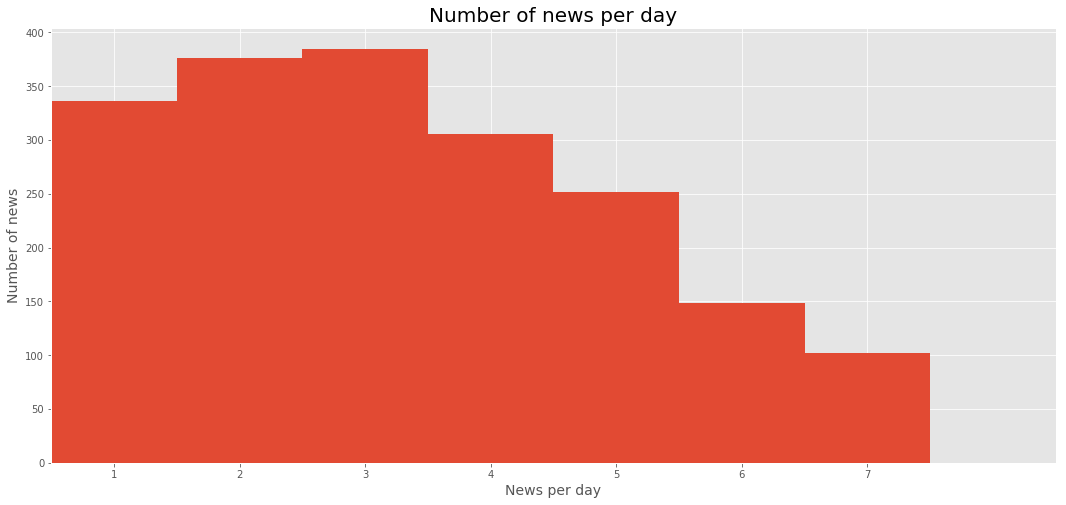

In [78]:
by_date = news['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 8.5)
plt.title("Number of news per day", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("News per day", fontdict={'fontsize': 14});
plt.savefig('hist_daily.png')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: sortlevel is deprecated, use sort_index(level=...)


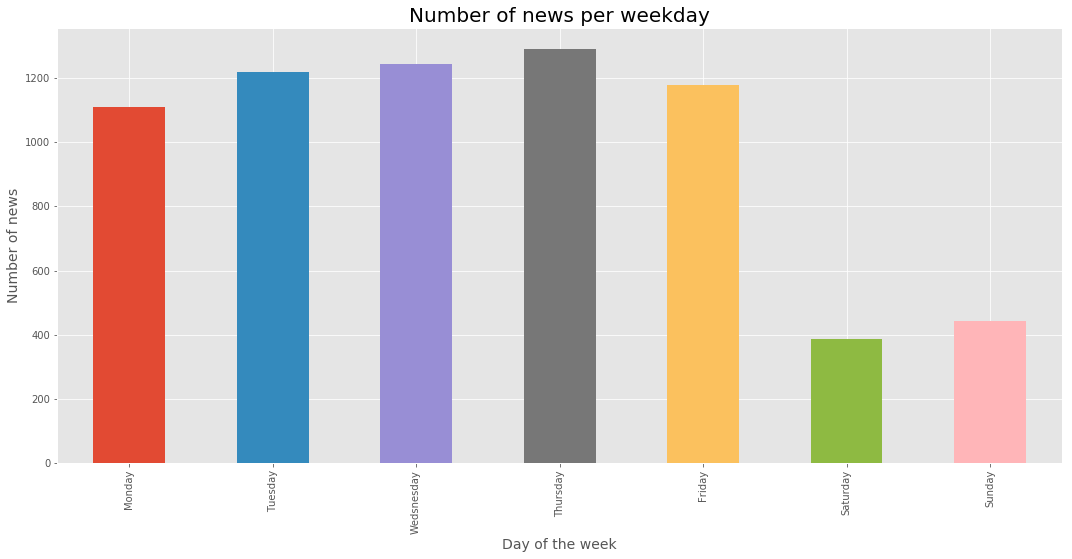

In [79]:
# Get day of the week with datetime method
news['Day'] = news['Date'].dt.dayofweek

# Create dictionary to label categorical variable produced by 'dayofweek' method
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# For each value in 'Weekday', apply function that labels with corresponding name of the weekday
news['Day'] = news['Day'].apply(lambda x: days[x])

# Order levels of factor variable

news['Day'] = \
    pd.Categorical(news['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

# Get count by weekday

by_weekday = news['Day'].value_counts().sortlevel()

# Plot of number of speeches per day of the week

by_weekday.plot.bar()
plt.title("Number of news per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});
plt.savefig('bar_weekday.png')

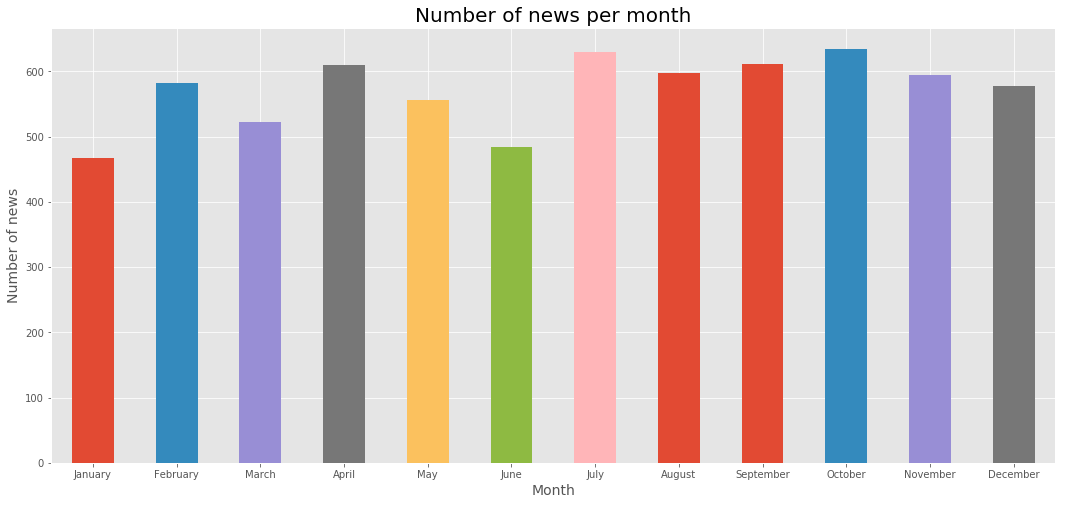

In [80]:
# Get count by month

by_month = news['Month'].value_counts().sort_index()
by_month

by_month.plot.bar()
plt.title("Number of news per month", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='horizontal');
plt.savefig('bar_month.png')

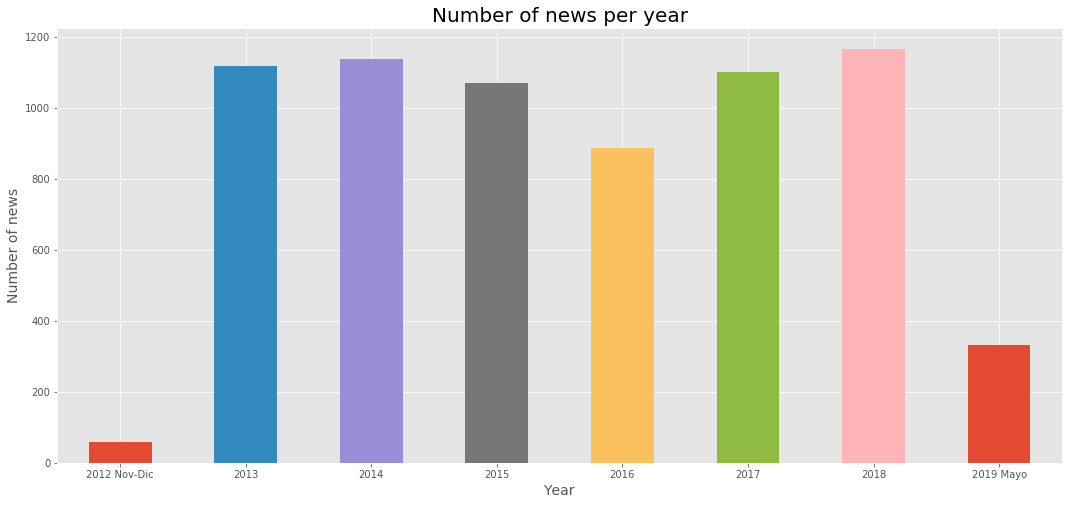

In [84]:
# Get count by year

by_year = news['Year'].value_counts().sort_index()
by_year

by_year.plot.bar()
plt.title("Number of news per year", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2012 Nov-Dic','2013','2014','2015','2016','2017','2018','2019 Mayo']
plt.xticks(range(8), labels, rotation='horizontal');
plt.savefig('bar_year.png')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


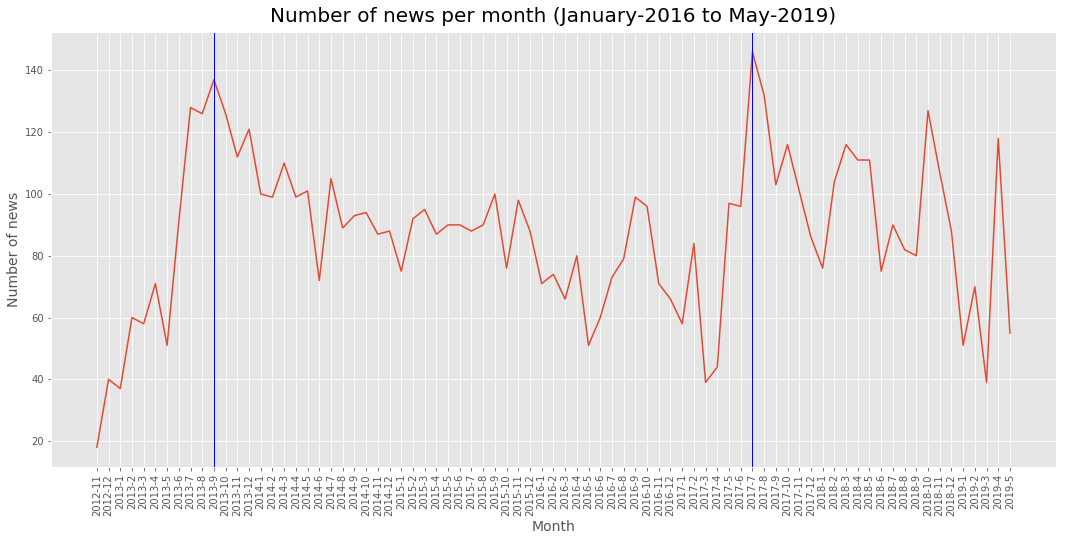

In [88]:
# Group by month

by_year_month = pd.groupby(news, by=[news['Date'].dt.year, news['Date'].dt.month])

month_labels = ['2012-11','2012-12','2013-1','2013-2','2013-3','2013-4','2013-5','2013-6','2013-7','2013-8','2013-9','2013-10','2013-11','2013-12',\
          '2014-1','2014-2','2014-3','2014-4','2014-5','2014-6','2014-7','2014-8','2014-9','2014-10','2014-11','2014-12',\
          '2015-1','2015-2','2015-3','2015-4','2015-5','2015-6','2015-7','2015-8','2015-9','2015-10','2015-11','2015-12',\
          '2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2016-7','2016-8','2016-9','2016-10','2016-11','2016-12',\
          '2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10','2017-11','2017-12',\
          '2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12',\
          '2019-1','2019-2','2019-3','2019-4','2019-5']

by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of news per month (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=56, linewidth=1, color='b');
plt.axvline(x=10, linewidth=1, color='b');
plt.savefig('line_month.png')

In [89]:
# Concatenate all speeches in one string
all_news = news.no_accent.str.cat(sep=',')

# Strip punctuation from string
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

# Strip punctuation from string
all_news = no_punct(all_news)

# Lowercase
all_news = all_news.lower()
len(all_news)

22530053

In [90]:
# Tokenize text
all_tokens = word_tokenize(all_news)

# Eliminate stopwords in Spanish
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

# Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')

# Drop stopwords
all_tokens = no_stopwords(all_tokens)
len(all_tokens)

2065346

In [91]:
text_news = nltk.Text(all_tokens)

In [92]:
text_news.concordance('tranvia', width=115)

Displaying 25 of 33 matches:
lacion proyectos redesarrollo ligados futuro corredor tranvia ejecucion programas mejoramiento integral reasentamie
 ferreos ciudad servicio transporte publico colectivo tranvia metro ligero corredores podria tener incidencia solo 
a ganaste bogota pieza representativa vagones antiguo tranvia capitalino exposicion conmemoracion vida pensamiento 
oximos dias corredores ferreos area urbana transitara tranvia tambien amigable ambiente igual manera programas mejo
smo trabaja utilizacion vias ferreas alli implementar tranvia unir poblaciones facatativa zipaquira misma soacha ce
ferentes bus electricos preservar medio ambiente caso tranvia modalidad puede estructurar movilidad diferente actua
paises desarrollados igual sucedio transporte publico tranvia acabado turba 9 abril bogotazo tesis falsa quiso vend
nsporte masivo totalmente electricas cero emision dos tranvia metro cable ademas tratar transformar vehiculos motor
tegrara sistemas transporte publico transmi

In [93]:
text_news.concordance('peaje', width=115)

Displaying 16 of 16 matches:
 228 1 febrero 2013 ministerio transporte fijo tarifas peaje vias concesionadas cargo instituto nacional vias invia
nsideracion ola invernal azoto pais tener cuenta valor peaje depende clasificacion estacion tipo vehiculo vehiculos
olucion 227 1 febrero 2013 fija valor pagar estaciones peaje via zipaquira bucaramanga cargo inco hoy agencia nacio
ego debe subir via bogotala calera 500 metros adelante peaje primera entrada mano derecha sitio conocido hato veter
da verjon bajo via bogotala calera 500 metros adelante peaje patios cancha tenis jornada iniciara 930 am administra
 norte calle 182 limite chia carrera septima calle 192 peaje avenida primero mayo avenida boyaca carrera 68 carrera
uecos calle 19 carreras 3 30 carrera septima calle 192 peaje avenida primero mayo avenida boyaca carrera 68 carrera
a norte carrera septima vale pena aclarar anuncio ayer peaje hacia norte queremos avanzar ampliacion autopista nort
avanzar ampliacion autopista norte cinco ca

In [94]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('servicio', 44631),
 ('selecciona', 41221),
 ('tramite', 34635),
 ('consultar', 34553),
 ('paso', 28181),
 ('bogota', 23708),
 ('informacion', 22832),
 ('deseas', 20611),
 ('realizar', 16328),
 ('accion', 14271),
 ('respecto', 14160),
 ('encontrar', 13956),
 ('podras', 13760),
 ('error', 13749),
 ('quieras', 13742),
 ('necesites', 13740),
 ('atencion', 10917),
 ('ciudad', 10589),
 ('publico', 9942),
 ('ser', 9627),
 ('alcaldia', 9416),
 ('am', 9214),
 ('mas', 9202),
 ('pm', 9130),
 ('viernes', 8228),
 ('1', 8226),
 ('lunes', 7846),
 ('8', 7779),
 ('horario', 7451),
 ('700', 7408),
 ('secretaria', 7182),
 ('cra', 7039),
 ('57', 7034),
 ('430', 7022),
 ('dirigido', 6976),
 ('ndeg', 6926),
 ('boton', 6924),
 ('clic', 6910),
 ('filtro', 6897),
 ('1065', 6877),
 ('haz', 6876),
 ('tel', 6876),
 ('3813000', 6871),
 ('distrital', 6209),
 ('calle', 6006),
 ('mayor', 4742),
 ('ciudadania', 4621),
 ('anos', 4617),
 ('carrera', 4481),
 ('salud', 4338),
 ('personas', 4333),
 ('localidad', 4191),


In [95]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [96]:
of_interest = ['seguridad','educacion','pobreza','desarrollo','empleo','trabajo','recursos','vida','social','inversion',\
 'ninos','victimas','policia','conflicto','futuro','economia','justicia','plan','programa','resultados',\
 'pasado','familia','congreso','infraestructura','derechos','unidos','proyectos','comercio','calidad',\
 'crecimiento','reforma','salud','prosperidad','oportunidad','mundo','internacional',\
 'problemas','obras','alcalde','violencia','vivienda','oportunidades','marcha','protesta','protestas','trabajar','construir',\
 'campo','pueblo','compromiso','nuevo','nueva','servicio'\
 ,'agua','tecnologia','acceso','alcaldes','democracia','cambio','derecho','empresa','empresas','problema','realidad'\
 ,'tierra','pobres','desempleo','extrema','responsabilidad','ciudadanos','empresarios','juntos','inversiones',\
 'campesinos','cifras','fiscal','construccion','accion','instituciones','confianza','acuerdos','universidad',\
 'policias','ejercito','colegio','cumplir','equidad','seguro','narcotrafico','militares','ciudades','tierras',\
 'ambiente','ciudad','programas','jovenes','viviendas','hijos','reformas','servicio','unidad','bogota',\
 'produccion','economico','colegios','comunidades','bienestar','competitividad','energia','cifra','empleos',\
 'corrupcion','mercados','patria','soldados','nacion','informacion','mercado','equipo','puerto',\
 'cultura','comunidad','crisis','tratado','partido','progreso','campana','humanos','venezuela','vias','publico',\
 'corte','sena','institucion', 'constitucion','economica','industria,''ninas','pacifico','departamentos','innovacion',\
 'leyes','ley','comision','presupuesto','alianza','invertir','productos','deporte','territorio','guerrilla',\
 'presente','nino','inteligencia','estudiantes','caribe','creciendo','indicadores','gratis','libertad',\
 'medidas','acciones','precio','dialogo','exterior','cafe','brasil','chile','armada','metas','empresa','banco',\
 'justo','publicos','producir','impacto','transporte','constitucional','mar','rio','dolares','dolar','duda',\
 'necesidad','politicas','publicas','servicios','rural','mineria','militar','armado','plata','plazo','amigos',\
 'cafeteros','alimentos','reparacion','respeto','vision','iniciativa','criminales','habana','reto','privado',\
 'prioridad','resultado','turismo','producto','cooperación','mesa','crimen','inversionistas','desigualdad',\
 'dificultades','historico','historica','planes','credito','optimismo','costo','solucion',\
 'riesgo','inflacion','terrorismo','transparencia','mujeres','escuela','medios','estrategia','judicial','dios',\
 'municipio','sostenible','voluntad','protección','universidades','homicidios','restitucion','fiscalia','infancia',\
 'climatico','condicion','ecuador','estudios','cobertura','delito','responsables',\
 'petroleo','partidos','civil','hechos','integracion','aeropuerto','padres','deuda','comunicacion','productividad',\
 'agricultura','planeta','ciudadano','demanda','petro','mejia','turbay','investigacion','competencia','negociacion','decreto',\
 'libros','delitos','ricos','tendencia','eficiente','invernal','trabajadores','porcentaje','riqueza',\
 'coordinacion','vulnerables','cese','exportaciones','institucionalidad','produce','retos','extorsion',\
 'eficiencia','democratica','fuego','niña','brechas','comandante','jueces','jugar','biodiversidad','natural',\
 'reconciliacion','efectividad','madres','politico','moderno','esperanza','canciller','drogas',\
 'gas','planeacion','tragedia','computadores','ciudadania','costos','autopistas','eficacia','negociando','enemigos',\
 'elecciones','alias','ambiental','oro','comandantes','dinero','frontera','puestos','subsidio','disposicion',\
 'rendicion','secuestro','minas','indigenas','financiero','prensa','cafetero','expertos','docentes','naturaleza',\
 'navarro','claudia','precios','concesiones','invierno','ilegal','eln','inseguridad','historico','historica',\
 'deficit','comercial','mujer','terroristas','impuestos','logros','inaugurar','posconflicto',\
 'productivo','desplazados','libro','delincuentes','tramites','carcel','intervencion','negociar',\
 'socios','reserva','formalizacion','madre','acueducto','puente','impuesto','ciencia','parque','tratados',\
 'periodistas','negociaciones','hospital','conpes','computador','coca','marihuana',\
 'tributaria','competir','desigualdades','dane','ofensiva','empresarial','metro','tranvia','transmilenio','tren',\
 'igualdad','hospitales','exportadores','industrial','sangre','ahorro','vecinos','droga','impunidad','muerte',\
 'maestros','agrario','consumidores','muertos','bomberos','inclusion','pardo','angela','cabecillas',\
 'emprendimiento','paramilitares','competitivos','formales','campesino','pib','emergencia',\
 'inauguracion','potable','salarios','matematicas','exportar','competitivo','gremios','periodismo','crimenes',\
 'coldeportes','economistas','digital','juventud','gratuidad','diversidad','regulacion','libertades','corruptos']

In [97]:
len(of_interest)

429

In [98]:
# Filter list of all tokens based on list of words of interest
tokens_of_interest = [w for w in all_tokens if w in of_interest]

# Join list in string
tokens_of_interest_str = ' '.join(tokens_of_interest)

# Write to txt file
with open('tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)

fdist = nltk.FreqDist(tokens_of_interest)
fdist.most_common()

[('servicio', 44631),
 ('bogota', 23708),
 ('informacion', 22832),
 ('accion', 14271),
 ('ciudad', 10589),
 ('publico', 9942),
 ('ciudadania', 4621),
 ('salud', 4338),
 ('vida', 3880),
 ('servicios', 3787),
 ('alcalde', 3727),
 ('construccion', 3075),
 ('ciudadanos', 3014),
 ('seguridad', 2982),
 ('social', 2928),
 ('policia', 2923),
 ('metro', 2901),
 ('desarrollo', 2848),
 ('transporte', 2658),
 ('transmilenio', 2501),
 ('ninos', 2303),
 ('tramites', 2219),
 ('ambiente', 2155),
 ('innovacion', 2111),
 ('mujeres', 2053),
 ('campana', 2053),
 ('trabajo', 2003),
 ('publicas', 1956),
 ('expertos', 1761),
 ('bomberos', 1732),
 ('plan', 1667),
 ('ciudadano', 1666),
 ('obras', 1619),
 ('muerte', 1611),
 ('comunidad', 1509),
 ('integracion', 1495),
 ('acciones', 1398),
 ('calidad', 1394),
 ('nuevo', 1378),
 ('programa', 1324),
 ('parque', 1314),
 ('nueva', 1296),
 ('recursos', 1285),
 ('alimentos', 1276),
 ('derechos', 1272),
 ('ambiental', 1228),
 ('empresa', 1194),
 ('jovenes', 1160),
 ('c

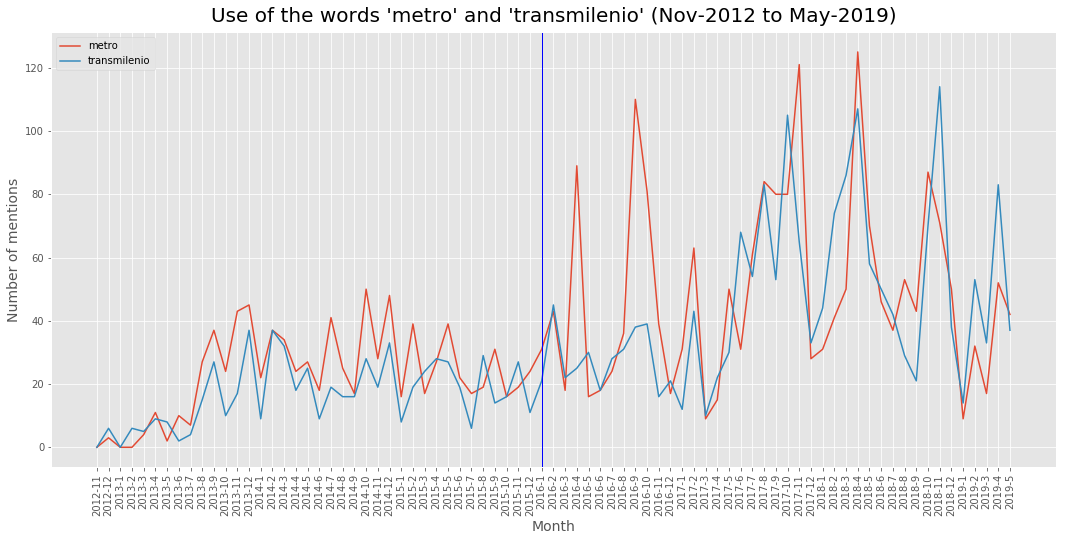

In [111]:
## Uso de las palabras metro, transmilenio y septima en el tiempo.

news['metro'] = [col_counter(news['no_stopwords'][i], 'metro') for i in range(len(news['no_stopwords']))]
news['transmilenio'] = [col_counter(news['no_stopwords'][i], 'transmilenio') for i in range(len(news['no_stopwords']))]
news['septima'] = [col_counter(news['no_stopwords'][i], 'septima') for i in range(len(news['no_stopwords']))]

metro_by_month = by_year_month['metro'].agg('sum')
transmilenio_by_month = by_year_month['transmilenio'].agg('sum')
metro_by_month.plot()
transmilenio_by_month.plot()
plt.title("Use of the words 'metro' and 'transmilenio' (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=38, linewidth=1, color='b')
plt.legend(['metro', 'transmilenio'], loc='upper left');
plt.savefig('metro_transmilenio_month.png')


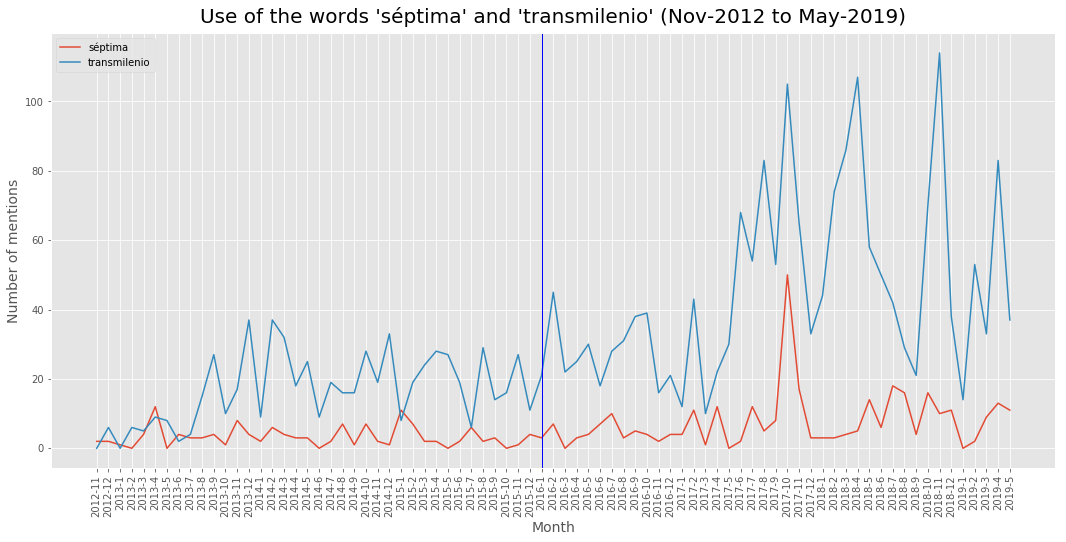

In [113]:
septima_by_month = by_year_month['septima'].agg('sum')
transmilenio_by_month = by_year_month['transmilenio'].agg('sum')
septima_by_month.plot()
transmilenio_by_month.plot()
plt.title("Use of the words 'séptima' and 'transmilenio' (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=38, linewidth=1, color='b')
plt.legend(['séptima', 'transmilenio'], loc='upper left');
plt.savefig('séptima_transmilenio_month.png')

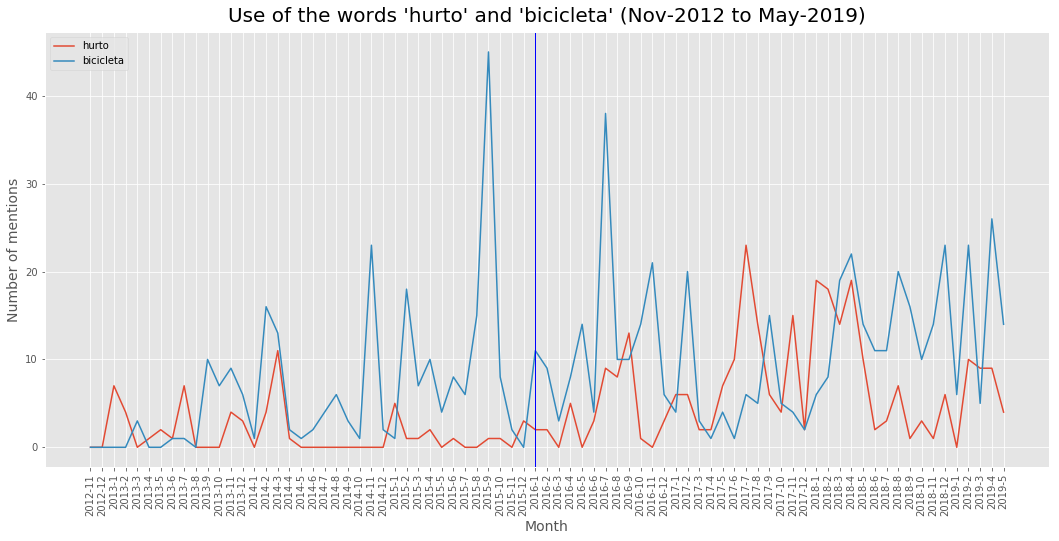

In [112]:
## Uso de las palabras hurto y bicicleta en el tiempo.

news['hurto'] = [col_counter(news['no_stopwords'][i], 'hurto') for i in range(len(news['no_stopwords']))]
news['bicicleta'] = [col_counter(news['no_stopwords'][i], 'bicicleta') for i in range(len(news['no_stopwords']))]

hurto_by_month = by_year_month['hurto'].agg('sum')
bicicleta_by_month = by_year_month['bicicleta'].agg('sum')
hurto_by_month.plot()
bicicleta_by_month.plot()
plt.title("Use of the words 'hurto' and 'bicicleta' (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=38, linewidth=1, color='b')
plt.legend(['hurto', 'bicicleta'], loc='upper left');
plt.savefig('hurto_bicicleta_month.png')

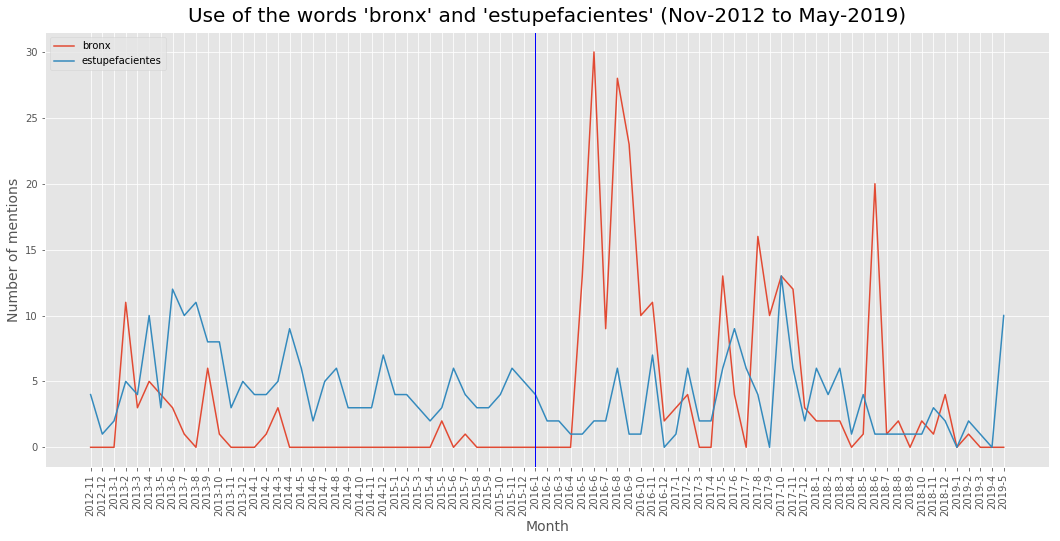

In [115]:
## Uso de las palabras bronx y estupefacientes en el tiempo.

news['bronx'] = [col_counter(news['no_stopwords'][i], 'bronx') for i in range(len(news['no_stopwords']))]
news['estupefacientes'] = [col_counter(news['no_stopwords'][i], 'estupefacientes') for i in range(len(news['no_stopwords']))]

bronx_by_month = by_year_month['bronx'].agg('sum')
estupefacientes_by_month = by_year_month['estupefacientes'].agg('sum')
bronx_by_month.plot()
estupefacientes_by_month.plot()
plt.title("Use of the words 'bronx' and 'estupefacientes' (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=38, linewidth=1, color='b')
plt.legend(['bronx', 'estupefacientes'], loc='upper left');
plt.savefig('bronx_estupefacientes_month.png')

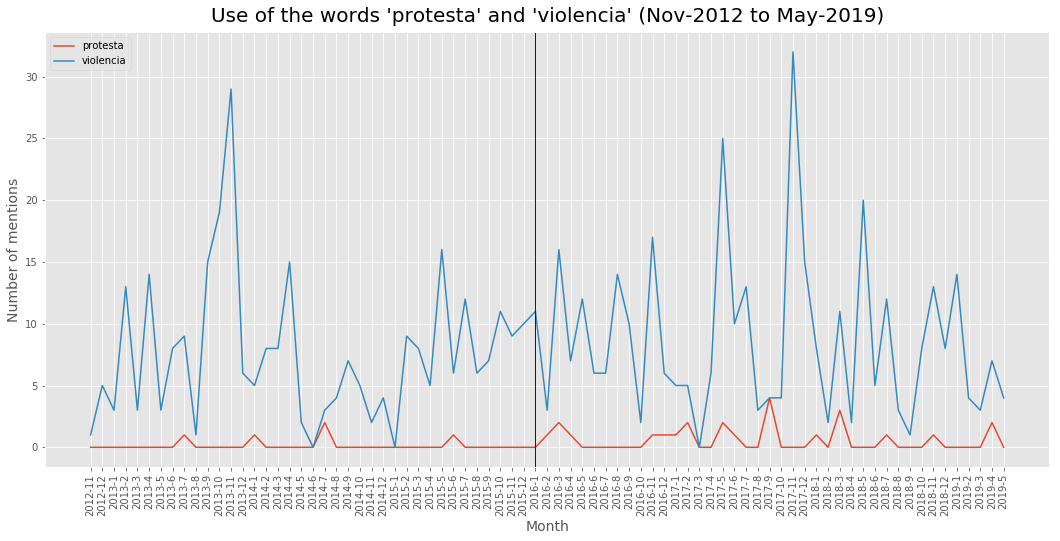

In [119]:
news['protesta'] = [col_counter(news['no_stopwords'][i], 'protesta') for i in range(len(news['no_stopwords']))]
news['marcha'] = [col_counter(news['no_stopwords'][i], 'marcha') for i in range(len(news['no_stopwords']))]
news['violencia'] = [col_counter(news['no_stopwords'][i], 'violencia') for i in range(len(news['no_stopwords']))]
news['abuso'] = [col_counter(news['no_stopwords'][i], 'abuso') for i in range(len(news['no_stopwords']))]
news['violencia'] = [col_counter(news['no_stopwords'][i], 'violencia') for i in range(len(news['no_stopwords']))]

protesta_by_month = by_year_month['protesta'].agg('sum')
violencia_by_month = by_year_month['violencia'].agg('sum')
protesta_by_month.plot()
violencia_by_month.plot()
plt.title("Use of the words 'protesta' and 'violencia' (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(79), labels, rotation='vertical')
plt.axvline(x=38, linewidth=1, color='b')
plt.legend(['protesta', 'violencia'], loc='upper left');
plt.savefig('protesta_violencia_month.png')

In [120]:
## Uso de las palabras para politica pública en el tiempo.

news['educacion'] = [col_counter(news['no_stopwords'][i], 'educacion') for i in range(len(news['no_stopwords']))]

news['pobreza'] = [col_counter(news['no_stopwords'][i], 'pobreza') for i in range(len(news['no_stopwords']))]

news['emprendimiento'] = [col_counter(news['no_stopwords'][i], 'emprendimiento') for i in range(len(news['no_stopwords']))]

news['formalizacion'] = [col_counter(news['no_stopwords'][i], 'formalizacion') for i in range(len(news['no_stopwords']))]

news['innovacion'] = [col_counter(news['no_stopwords'][i], 'innovacion') for i in range(len(news['no_stopwords']))]

news['industria'] = [col_counter(news['no_stopwords'][i], 'industria') for i in range(len(news['no_stopwords']))]

news['comercio'] = [col_counter(news['no_stopwords'][i], 'comercio') for i in range(len(news['no_stopwords']))]

news['servicios'] = [col_counter(news['no_stopwords'][i], 'servicios') for i in range(len(news['no_stopwords']))]

news['empleo'] = [col_counter(news['no_stopwords'][i], 'empleo') for i in range(len(news['no_stopwords']))]

news['defensa'] = [col_counter(news['no_stopwords'][i], 'defensa') for i in range(len(news['no_stopwords']))]

news['social'] = [col_counter(news['no_stopwords'][i], 'social') for i in range(len(news['no_stopwords']))]

news['salud'] = [col_counter(news['no_stopwords'][i], 'salud') for i in range(len(news['no_stopwords']))]

news['infancia'] = [col_counter(news['no_stopwords'][i], 'infancia') for i in range(len(news['no_stopwords']))]

news['infraestructura'] = [col_counter(news['no_stopwords'][i], 'infraestructura') for i in range(len(news['no_stopwords']))]

news['productividad'] = [col_counter(news['no_stopwords'][i], 'productividad') for i in range(len(news['no_stopwords']))]

news['competitividad'] = [col_counter(news['no_stopwords'][i], 'competitividad') for i in range(len(news['no_stopwords']))]

news['vivienda'] = [col_counter(news['no_stopwords'][i], 'vivienda') for i in range(len(news['no_stopwords']))]

news['ciencia'] = [col_counter(news['no_stopwords'][i], 'ciencia') for i in range(len(news['no_stopwords']))]

news['tecnologia'] = [col_counter(news['no_stopwords'][i], 'tecnologia') for i in range(len(news['no_stopwords']))]

news['transporte'] = [col_counter(news['no_stopwords'][i], 'transporte') for i in range(len(news['no_stopwords']))]

news['deporte'] = [col_counter(news['no_stopwords'][i], 'deporte') for i in range(len(news['no_stopwords']))]

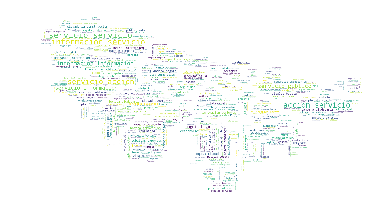

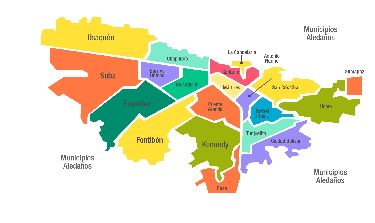

In [124]:
## Word Cloud 

# Based on https://github.com/amueller/word_cloud/blob/master/examples/masked.py
# Word cloud requirements

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

d = path.dirname('/Users/sebastiancastrorodriguez/Desktop/2019-1/MCPP/Proyecto_Final/tokens_of_interest_str.txt')

# Read the whole text
text = open(path.join(d, 'tokens_of_interest_str.txt')).read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
bogota_mask = np.array(Image.open(path.join(d, "Images/mapa-localidades-bogota.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=bogota_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "wordcloud.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(bogota_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [125]:
totals_by_topic = news.iloc[:,13:].sum()
totals_by_topic = totals_by_topic.sort_values(ascending=False)
totals_by_topic

salud              4336
servicios          3786
social             2927
transporte         2657
transmilenio       2500
innovacion         1897
educacion          1010
comercio            893
infraestructura     796
bicicleta           701
violencia           648
industria           562
tecnologia          499
vivienda            494
septima             448
marcha              413
infancia            369
deporte             355
hurto               338
estupefacientes     320
bronx               283
defensa             242
empleo              231
emprendimiento      157
pobreza             126
ciencia             119
abuso                69
productividad        66
competitividad       64
formalizacion        40
protesta             29
paro                 26
séptima               0
dtype: int64

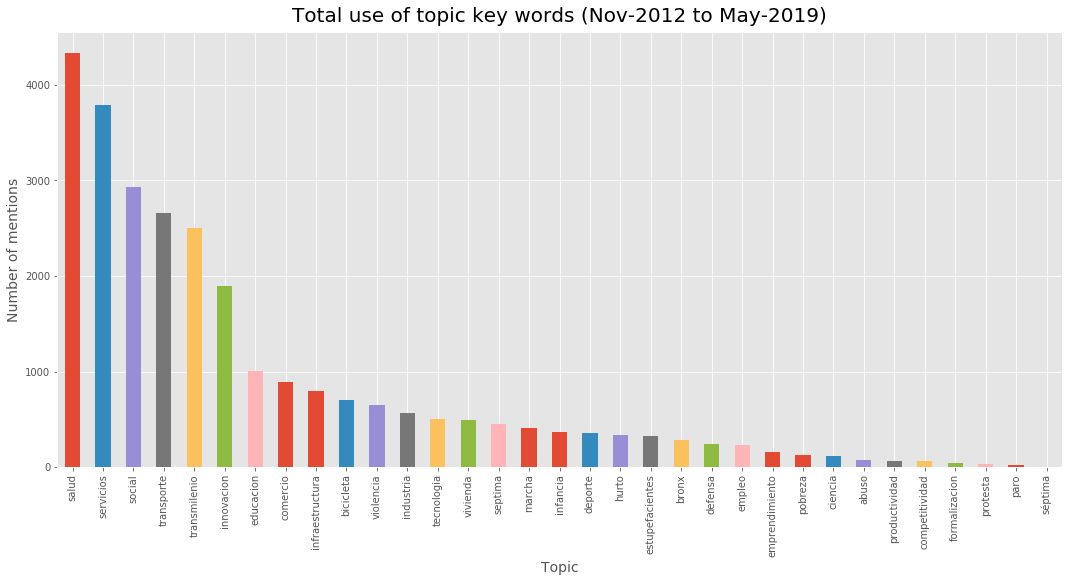

In [129]:
totals_by_topic.plot(kind='bar')

plt.title("Total use of topic key words (Nov-2012 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Topic", fontdict={'fontsize': 14})
plt.savefig('topics_total.png')

In [131]:
## Collocations

all_news_text = nltk.Text(all_tokens)
all_news_text.collocations(num = 100)

deseas consultar; tramite deseas; selecciona servicio; podras
encontrar; accion quieras; quieras realizar; encontrar informacion;
informacion respecto; paso podras; servicio tramite; necesites
consultar; respecto tramite; error selecciona; servicio necesites;
selecciona accion; 1065 tel; haz clic; ndeg 1065; clic boton; 3813000
horario; paso paso; lunes viernes; viernes 700; boton ser; ser
dirigido; horario atencion; publico lunes; consultar selecciona;
atencion publico; tramite servicio; dirigido informacion; filtro paso;
consultar haz; consultar cra; realizar error; consultar error;
informacion paso; realizar selecciona; enrique penalosa; auditorio
huitaca; oficial bomberos; cumple 124; supercade movil; jardin
botanico; cuerpo oficial; daran cita; publicas privadas; nacionales
internacionales; continua recorriendo; marcar diferencia; cita
auditorio; internacionales daran; conoce detalles; expertos
nacionales; usar casco; turno fontibon; muerte conoce; alcaldia
bogota; ahora turno; co

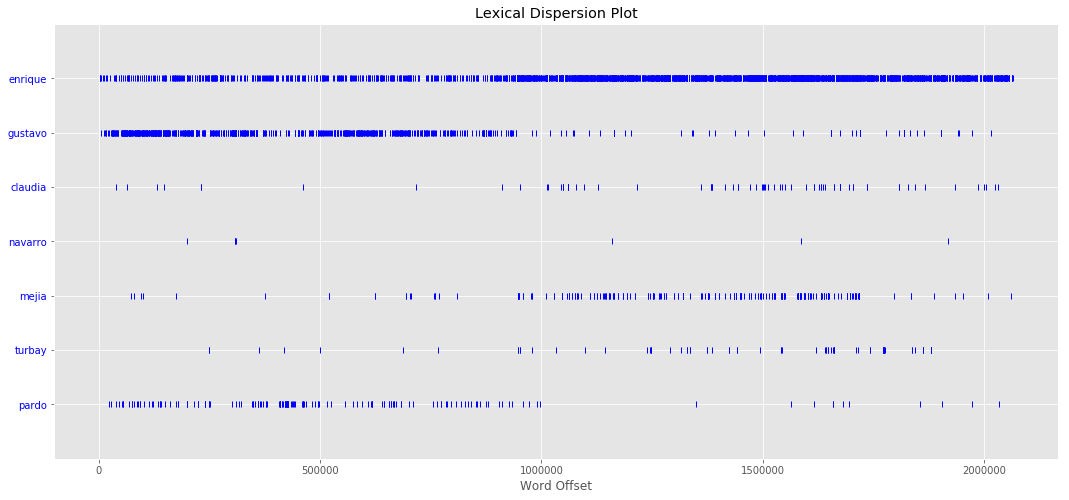

In [133]:
all_news_text.dispersion_plot(['enrique', 'gustavo', 'claudia', 'navarro', 'mejia', 'turbay','pardo'])

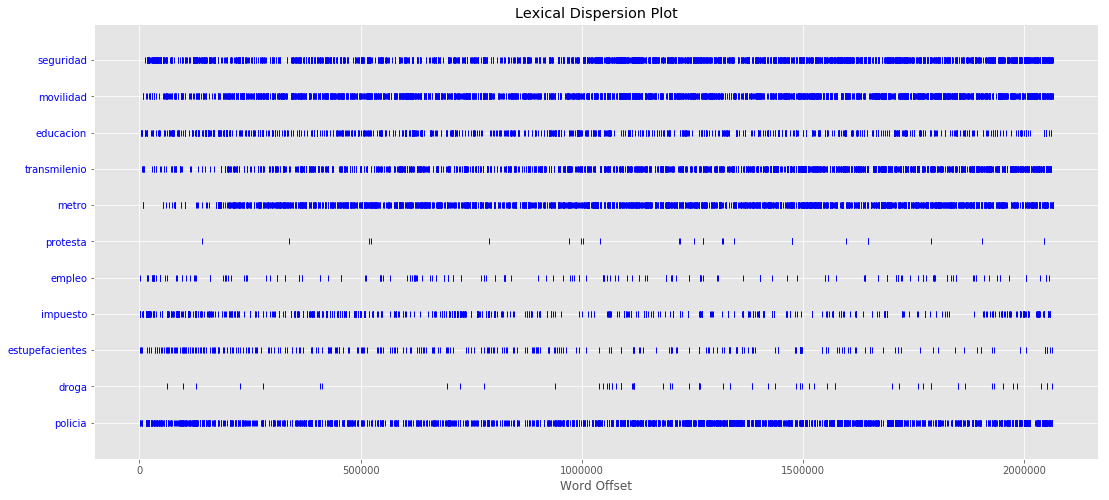

In [134]:
all_news_text.dispersion_plot(['seguridad', 'movilidad', 'educacion', 'transmilenio', 'metro', 'protesta',\
                                  'empleo', 'impuesto', 'estupefacientes', 'droga', 'policia'])

In [135]:
## Analisis de redes

#Nuevo data frame

news1 = news.loc[:,["no_accent", "tokens", "no_stopwords", "nltk_Text"]]

#Definimos stopwords y otras palabras para quitar de los textos
stopwords_esp = nltk.corpus.stopwords.words('spanish')
stopwords_esp = [unidecode.unidecode(x) for x in stopwords_esp]

stopwords_esp = stopwords_esp + ["mas", "ano", "tambien", "asi", "ademas", "anos",
                                 "dos", "estan", "traves", "cada", "hacer", "mismo",
                                  "solo", "tener", "hace", "vez","tres"] 
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

news1["no_stop2"] = news1["no_stopwords"].apply(no_stopwords) 

#Funciones para obtener keywords

def get_keywords(tokens):
    '''
    Obtiene las cinco palabras más repetidas del texto
    '''
    return Counter(tokens).most_common(3)

def set_keywords(tokens):
    '''
    Junta a un data frame las palabras más repetidas de cada texto
    '''
    key = get_keywords(tokens)
    x = []
    for pair in key:
        x += [pair[0]]
    return x

news1["keywords"] = news1["no_stop2"].apply(set_keywords)

#Separamos lista de keywords y creamos función para emparejar

keywords = list(news1["keywords"])

def permut(keyword_list):
    orig_dest = []
    for i in range(len(keyword_list)):
        x = list(permutations(keyword_list[i], 2))
        orig_dest += x
    return orig_dest

orig_dest = list(permut(keywords))

#Separar tupla en dos columnas y crear nuevo dataframe

origin, dest = zip(*orig_dest)

nodes = list(origin + dest)
nodes = pd.DataFrame({"node": nodes})
nodes = nodes["node"].unique()
nodes = pd.DataFrame({"node": nodes})
nodes = nodes.reset_index()
nodes.columns = ["index", "node"]
nodes.to_csv("nodes.csv", sep = ",")


edges = pd.DataFrame({"origin": origin, "destiny": dest})

nodes_list = list(nodes["node"])

def source_target(word):
    for i in range(len(nodes_list)):
        if nodes_list[i] == word:
            x = i
    return x
    
edges["Source"] = edges["origin"].apply(source_target)
edges["Target"] = edges["destiny"].apply(source_target)

edges.to_csv("edges.csv", sep = ",")